In [1]:
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
colPickle = open("./cols.pkl","rb")
importantColumns = pickle.load(colPickle)
importantColumns = importantColumns[2:]

### extracting and separating files

In [3]:
Phone1Files = []
Phone2Files = []
NameMapping = dict()
for root, dirs, files in os.walk("./data"):
    for name in files:
        fpath = os.path.join(root, name)
        if name.find("Phone_1") != -1:
            Phone1Files.append(fpath)
        else:
            Phone2Files.append(fpath)

In [4]:
for i in range(len(Phone1Files)):
    phone1df = pd.read_csv(Phone1Files[i])
    phone1df.drop(phone1df.tail(8).index, inplace=True) #Removing aggregate Statistics
    dataToKeep = ["TIME_STAMP", "Event Technology","5G KPI PCell RF Frequency [MHz]","LTE KPI PCell Serving EARFCN(DL)","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]","LTE KPI UL CA Type","5G KPI Total Info UL CA Type","LTE KPI PCell Serving RSRP[dBm]","5G KPI PCell RF Serving SS-RSRP [dBm]","5G KPI PCell RF Serving SS-RSRQ [dB]","LTE KPI PCell Serving RSRQ[dB]"]
    phone1df = phone1df[phone1df.columns.intersection(set(dataToKeep))]
    columns = phone1df.columns.values.tolist()
    if len(columns) != len(dataToKeep):
        for column in dataToKeep:
            if column not in columns:
                print("Adding column ", column)
                phone1df[column] = 0
    phone1df["TIME_STAMP"] = pd.to_datetime(phone1df["TIME_STAMP"])
    phone1df = phone1df.sort_values("TIME_STAMP")
    phone1df["Experiment"] = 0
    phone1df['Experiment'] = (phone1df['TIME_STAMP']
                    .transform(lambda x: x.diff().gt('1Sec').cumsum())
                    )
    if phone1df["Experiment"].max() == 29:
        phone1df[phone1df["Experiment"] < 5].to_csv('Phone1Static.csv', mode = 'a',header=not os.path.exists('Phone1Static.csv'))
        phone1df[(phone1df["Experiment"] >= 5) & (phone1df["Experiment"] < 10)].to_csv('Phone1Away.csv', mode = 'a',header=not os.path.exists('Phone1Away.csv'))
        phone1df[(phone1df["Experiment"] >= 10) & (phone1df["Experiment"] < 15)].to_csv('Phone1Ping.csv', mode = 'a',header=not os.path.exists('Phone1Ping.csv'))
        phone1df[phone1df["Experiment"] == 29].to_csv('Phone1PingMobility.csv', mode = 'a',header=not os.path.exists('Phone1PingMobility.csv'))
        phone1df[(phone1df["Experiment"] == 26) | (phone1df["Experiment"] == 25)].to_csv('Phone1Mobility.csv', mode = 'a',header=not os.path.exists('Phone1Mobility.csv'))
        phone1df.to_csv('phone1.csv', mode='a')


C:\Users\smeet\AppData\Local\Temp\ipykernel_25416\821205151.py:2: DtypeWarning: Columns (169,170,177,197,210,215,222,228,235,241,248,254,261) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
C:\Users\smeet\AppData\Local\Temp\ipykernel_25416\821205151.py:2: DtypeWarning: Columns (169,197,210,215,222,231,238,247,254,263,270) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
C:\Users\smeet\AppData\Local\Temp\ipykernel_25416\821205151.py:2: DtypeWarning: Columns (30,95,111,113,121,122,126,134,162,163,164,171,172,192,199,205,206,213,233,246,251,252,259,275,280,281,288,292,304,305,312,328,333,334,341,357,363,364) have mixed types. Specify dtype option on import or set low_memory=False.
  phone1df = pd.read_csv(Phone1Files[i])
C:\Users\smeet\AppData\Local\Temp\ipykernel_25416\821205151.py:2: DtypeWarning: Columns (79,95,98,106,122,216,217,224,244,257,262,269,278,2

In [5]:
for i in range(len(Phone2Files)):
    phone2df = pd.read_csv(Phone2Files[i])
    phone2df.drop(phone2df.tail(8).index, inplace=True) #Removing aggregate Statistics
    phone2df = phone2df.filter(importantColumns)
    phone2df["TIME_STAMP"] = pd.to_datetime(phone2df["TIME_STAMP"])
    phone2df = phone2df.sort_values("TIME_STAMP")
    phone2df["Experiment"] = 0
    phone2df['Experiment'] = (phone2df['TIME_STAMP']
                    .transform(lambda x: x.diff().gt('1Sec').cumsum() + 30)
                    )
    if phone2df["Experiment"].max() == 41:
        phone2df.to_csv('phone2.csv', mode='a')

C:\Users\smeet\AppData\Local\Temp\ipykernel_25416\1344981687.py:2: DtypeWarning: Columns (169,170,177,197,210,215,222,231,238,247,254,263,270) have mixed types. Specify dtype option on import or set low_memory=False.
  phone2df = pd.read_csv(Phone2Files[i])
C:\Users\smeet\AppData\Local\Temp\ipykernel_25416\1344981687.py:2: DtypeWarning: Columns (30,93,100,103,104,108,116,144,145,146,153,154,174,181,186,189,190,197,223,236,240,243,250,262,265,272,284,287,294,306,309,316,317,318) have mixed types. Specify dtype option on import or set low_memory=False.
  phone2df = pd.read_csv(Phone2Files[i])
C:\Users\smeet\AppData\Local\Temp\ipykernel_25416\1344981687.py:2: DtypeWarning: Columns (243,244,251,264,277,284,285,292,318,319,326,339,352,359,360,367,389) have mixed types. Specify dtype option on import or set low_memory=False.
  phone2df = pd.read_csv(Phone2Files[i])
C:\Users\smeet\AppData\Local\Temp\ipykernel_25416\1344981687.py:2: DtypeWarning: Columns (243,250,267,274,291,298,315,322) have 

### Plots

In [6]:
import pandas as pd
import numpy as np
def GenerateGraph(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["TIME_STAMP", "Event Technology","5G KPI PCell RF Frequency [MHz]","LTE KPI PCell Serving EARFCN(DL)","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"]]
    df['Event Technology'].ffill(inplace=True)
    df["5G KPI PCell RF Frequency [MHz]"].ffill(inplace=True)
    df["LTE KPI PCell Serving EARFCN(DL)"].ffill(inplace=True)
    df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df = df[df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"] > 0]
    df.dropna(subset = ['Event Technology'], inplace=True)

    count = {}
    LTEDict = {'1025': 1972.5,'2560' : 885, '2600': 889.00, '900' : 1960.00, '954' : 1965.40, '854' : 1955.40, '1001' : 1970.10,'1076' : 1977.60,'66611' : 2127.50, '804' : 1950.40,'1099' : 1979.90, '1100' : 1980.00, '1123' : 1982.30, '1125' : 1982.50, '1126' : 1982.60, '1148' : 1984.80, '1150' : 1985.00, '2000' : 2115.00, '2050' : 2120.00, '2125' : 2127.50, '2175' : 2132.50, '2200' : 2135.00, '2225' : 2137.50, '2300' : 2145.00, '2325' : 2147.50, '2460': 875.0,  '39750' : 2506.00, '39907' : 2521.70, '39948' : 2525.80, '40072' : 2538.20, '40384' : 2569.40, '40770' : 2608.00, '40810' : 2612.00, '41176' : 2648.60, '41238' : 2654.80, '41490' : 2680.00, '5035' : 731.50, '5090' : 737, '5095' : 737.50, '5110' : 739.00, '5330' : 763.00, '5780' : 739, '5815': 742.5, '66486': 2115.00, '66487' : 2115.10, '66536' : 2120.00, '66561' : 2122.5, '66586' : 2125, '66661' : 2132.50, '66686' : 2135, '66711' : 2137.50, '66736' : 2140.00, '66786' : 2145.00, '66811': 2147.5, '66836': 2150, '66886': 2150, '66911': 2150, '66961': 2150, '66986' : 2165.00, '67011': 2167.5, '675' : 1937.50, '676': 1937.6, '677': 1937.7, '68611': 619.5, '68636': 622, '68661': 624.5, '68686': 627, '68786': 637, '68836': 637, '68861': 637, '68886': 637, '68911': 649.5, '700' : 1940.00, '725': 1942.5, '750': 1942.5, '775': 1942.5, '801': 1950.1, '8115': 1937.5, '825': 1952.5, '8264': 1952.4, '8290': 1952.4, '8315': 1952.4, '8465': 1972.5, '850' : 1955.00, '851': 1955.1, '852': 1955.1, '8539': 1979.9, '8562': 1982.2, '8640': 1982.2, '8665': 1992.5, '875' : 1957.50, '876': 1957.6, '8763': 866.3, '877': 1957.7, '8950': 885, '901': 1960.1, '925' : 1962.50, '41305' : 2661.50, '66761' : 2142.50}
    
    import datetime as dt
    import math
    for index, row in df.iterrows():
        day = row["TIME_STAMP"][:10]
        if day not in count:
            count[day] = [0,0,0,0,0]
        if row["Event Technology"][:2] == '5G':
            frequency = float(row["5G KPI PCell RF Frequency [MHz]"])
            if frequency <= 1000:
                count[day][0] += 1
            elif frequency < 7000:
                count[day][1] += 1
            else:
                count[day][2] += 1
        else:
            number = float(row["LTE KPI PCell Serving EARFCN(DL)"])
            if math.isnan(number):
                print(number)
                continue
            frequency = LTEDict[str(int(number))]
            if  frequency < 1000:
                count[day][3] += 1
            else:
                count[day][4] += 1

    import matplotlib.pyplot as plt 

    lowBand = []
    midBand = []
    mmWave = []
    LTE = []
    LTEAdvanced = []
    Keys = []
    for key in sorted(count):
        total = float(sum(count[key]))
        Keys.append(key)
        lowBand.append(count[key][0]/total)
        midBand.append(count[key][1]/total)
        mmWave.append(count[key][2]/total)
        LTE.append(count[key][3]/total)
        LTEAdvanced.append(count[key][4]/total)
    
    
    lowBand = np.array(lowBand)
    midBand = np.array(midBand)
    mmWave = np.array(mmWave)
    LTE = np.array(LTE)
    LTEAdvanced = np.array(LTEAdvanced)
    fig,ax = plt.subplots(figsize=(20,6))
    plt.bar(Keys, mmWave, label = "mm Wave",linewidth=3)
    plt.bar(Keys, midBand, label = "Mid Band",linewidth=3, bottom = mmWave)
    plt.bar(Keys, lowBand, label = "Low Band",linewidth=3, bottom = mmWave + midBand)
    plt.bar(Keys, LTE, label = "LTE",linewidth=3, bottom = lowBand + midBand + mmWave)
    plt.bar(Keys, LTEAdvanced, label = "LTE Advanced",linewidth=3, bottom = lowBand + midBand+ mmWave + LTE)

    # customize the plot 
    ax.set_xlabel('Dates')
    ax.set_ylabel('Percentage of Technology')
    ax.set_title(f'{title} -- Date-wise Percentage of Technologies')
    plt.legend(loc="lower center",fontsize="10",bbox_to_anchor=(0.15, 0.2))
    ax.legend(title= 'Event Technology')
    plt.xticks(Keys, rotation=90)
    plt.show()

In [7]:
def GenerateGraphThroughput(location,title):
    iter_csv = pd.read_csv(location, iterator=True, chunksize=1000)
    df = pd.concat([chunk for chunk in iter_csv])
    df = df[["TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"]]
    
    # df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df.dropna(subset = ["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"], inplace=True)

    df["TIME_STAMP"] = df["TIME_STAMP"].apply(lambda x: x[:10])
    df = df[["TIME_STAMP","Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"]]
    df = df.groupby("TIME_STAMP",as_index=False).mean()
    
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(figsize=(20,6))
    plt.bar(df["TIME_STAMP"], df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"],linewidth=3)

    # customize the plot 
    ax.set_xlabel('Dates')
    ax.set_ylabel('Mean Throughput [Mbps]')
    ax.set_title(f'{title} -- Date-wise Mean Throughput')
    plt.xticks(df["TIME_STAMP"], rotation=90)
    plt.show()


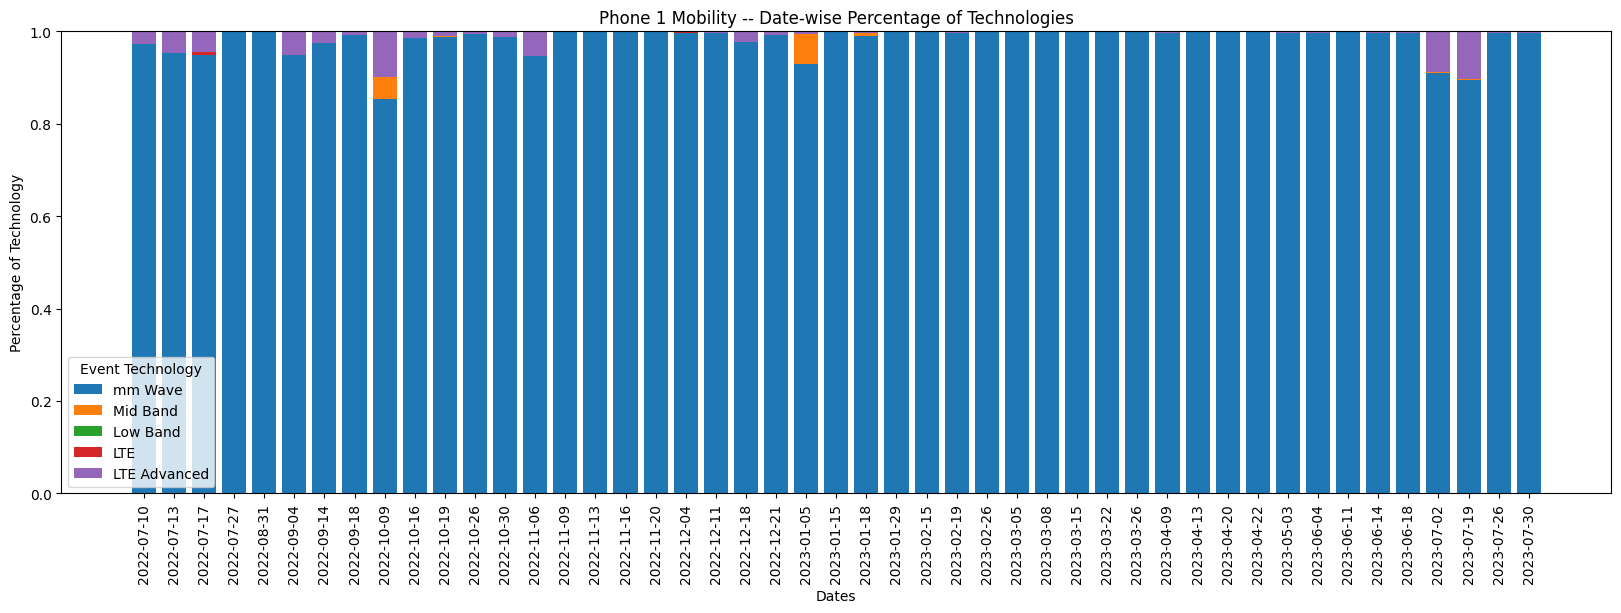

In [8]:
GenerateGraph("Phone1Mobility.csv", "Phone 1 Mobility")

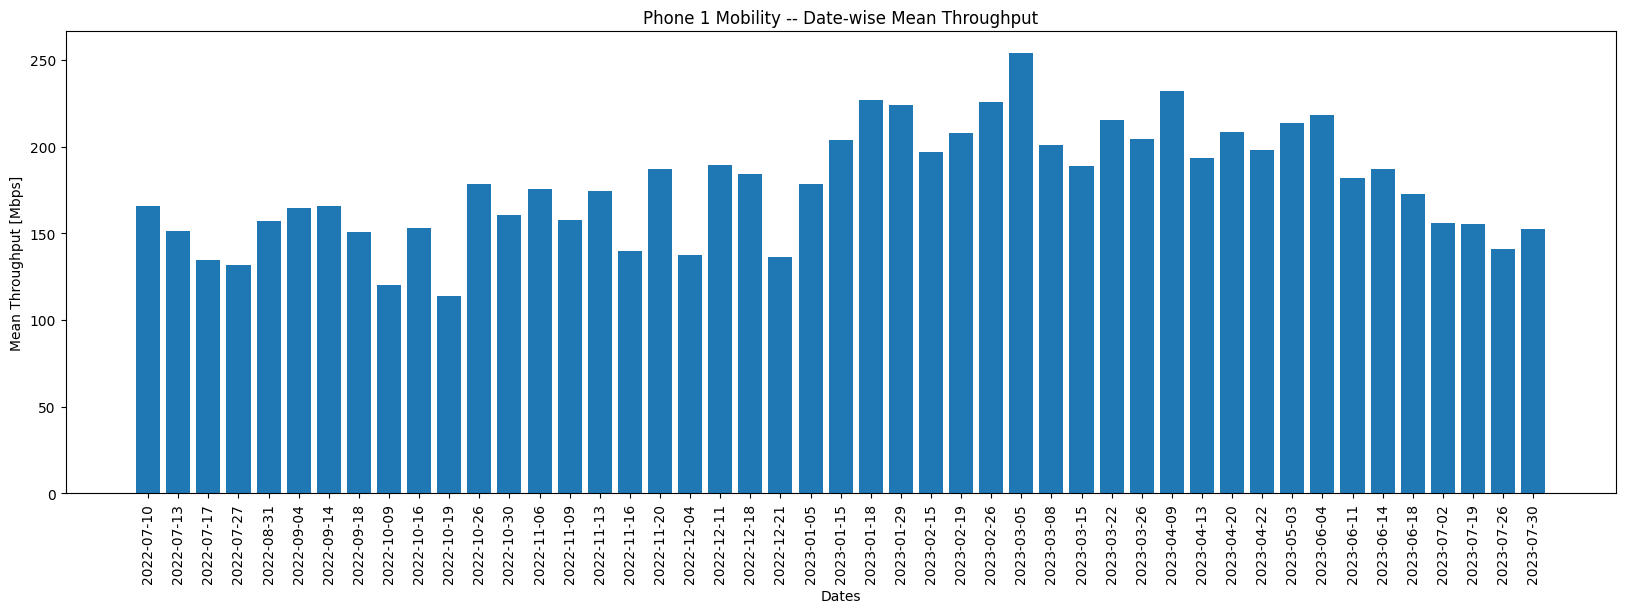

In [9]:
GenerateGraphThroughput("Phone1Mobility.csv", "Phone 1 Mobility")

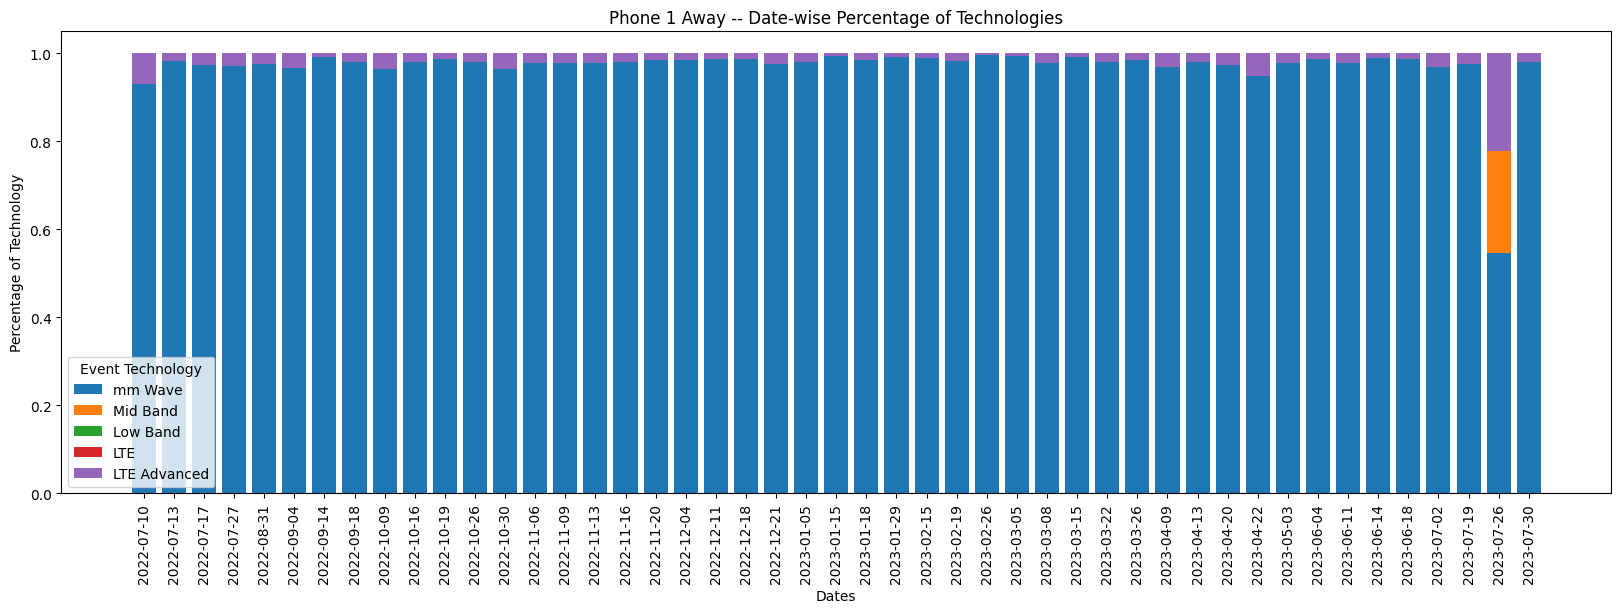

In [10]:
GenerateGraph("Phone1Away.csv", "Phone 1 Away")

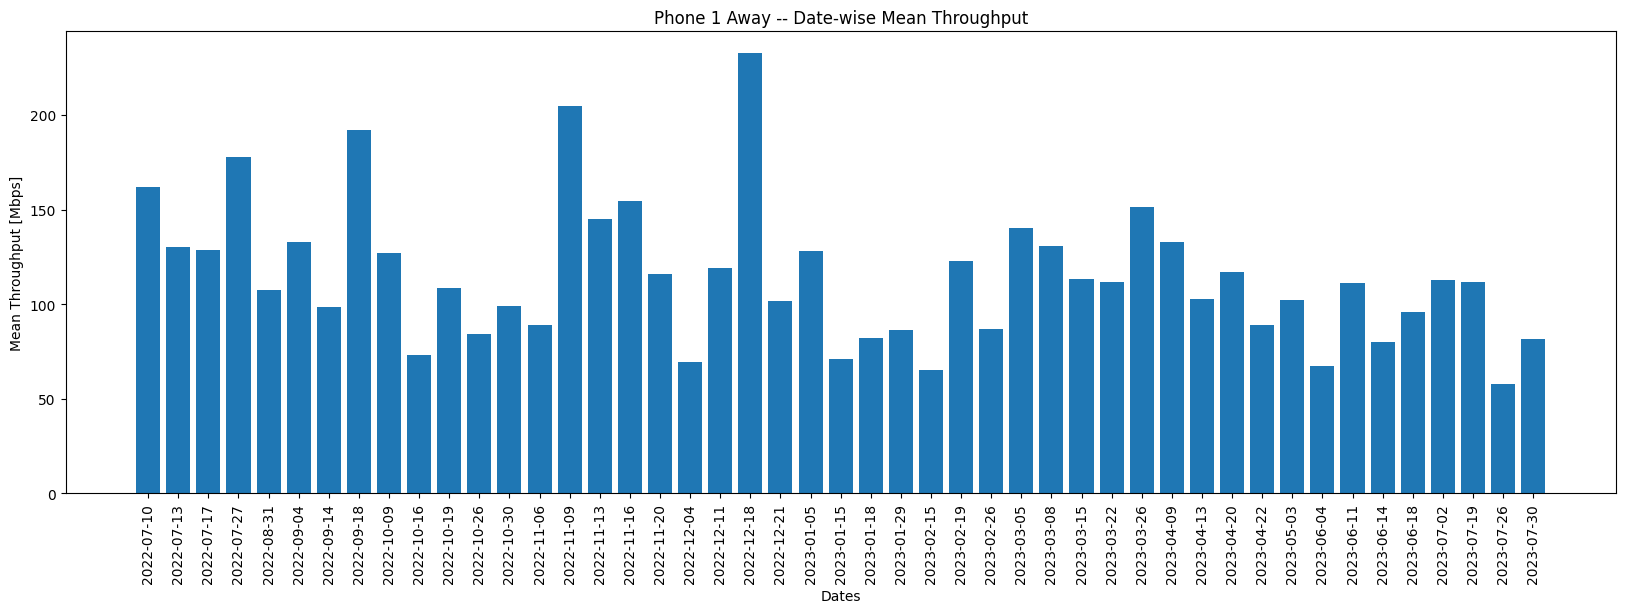

In [11]:
GenerateGraphThroughput("Phone1Away.csv", "Phone 1 Away")

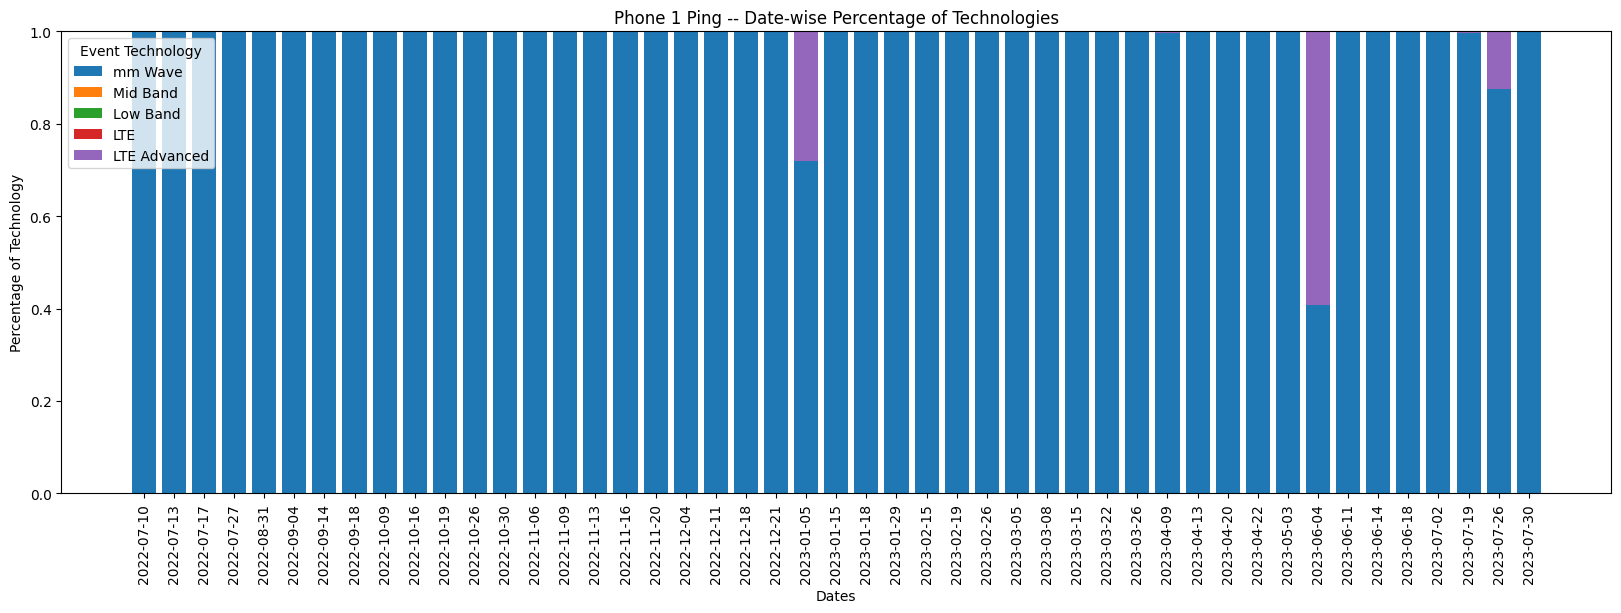

In [12]:
GenerateGraph("Phone1Ping.csv", "Phone 1 Ping")

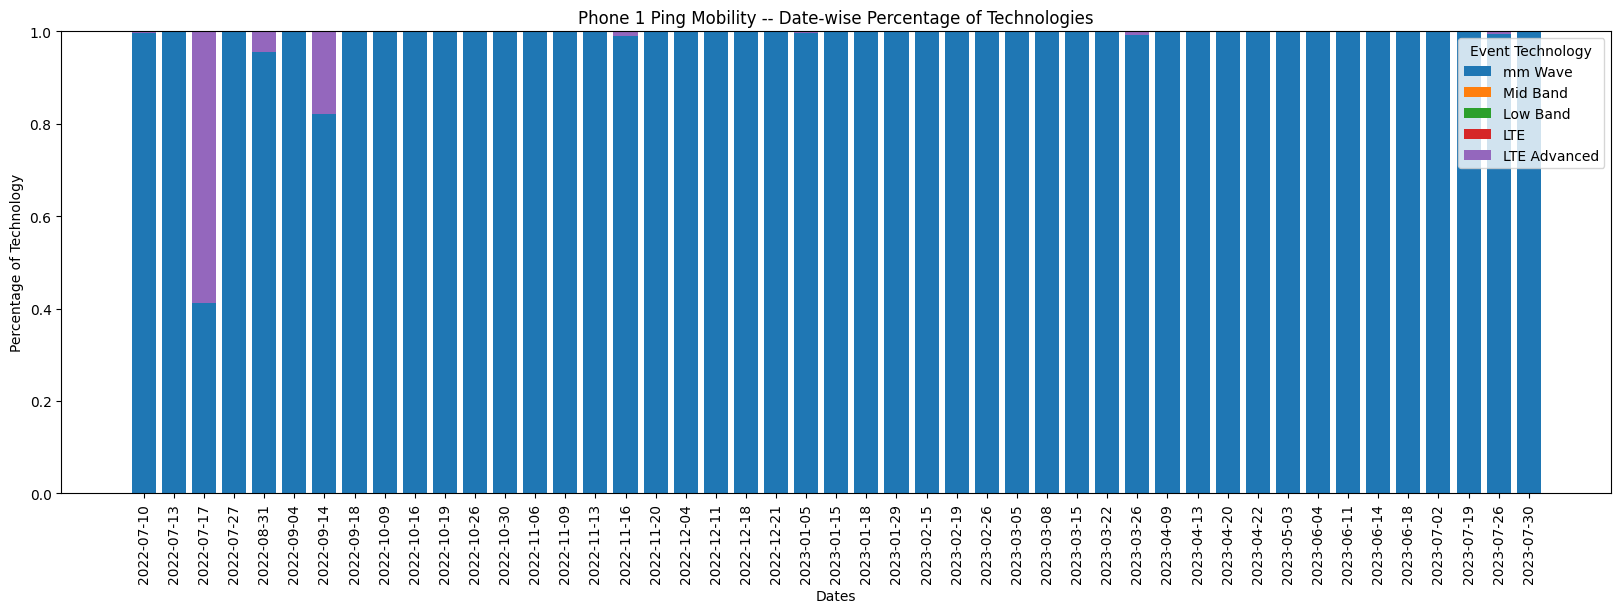

In [13]:
GenerateGraph("Phone1PingMobility.csv", "Phone 1 Ping Mobility")

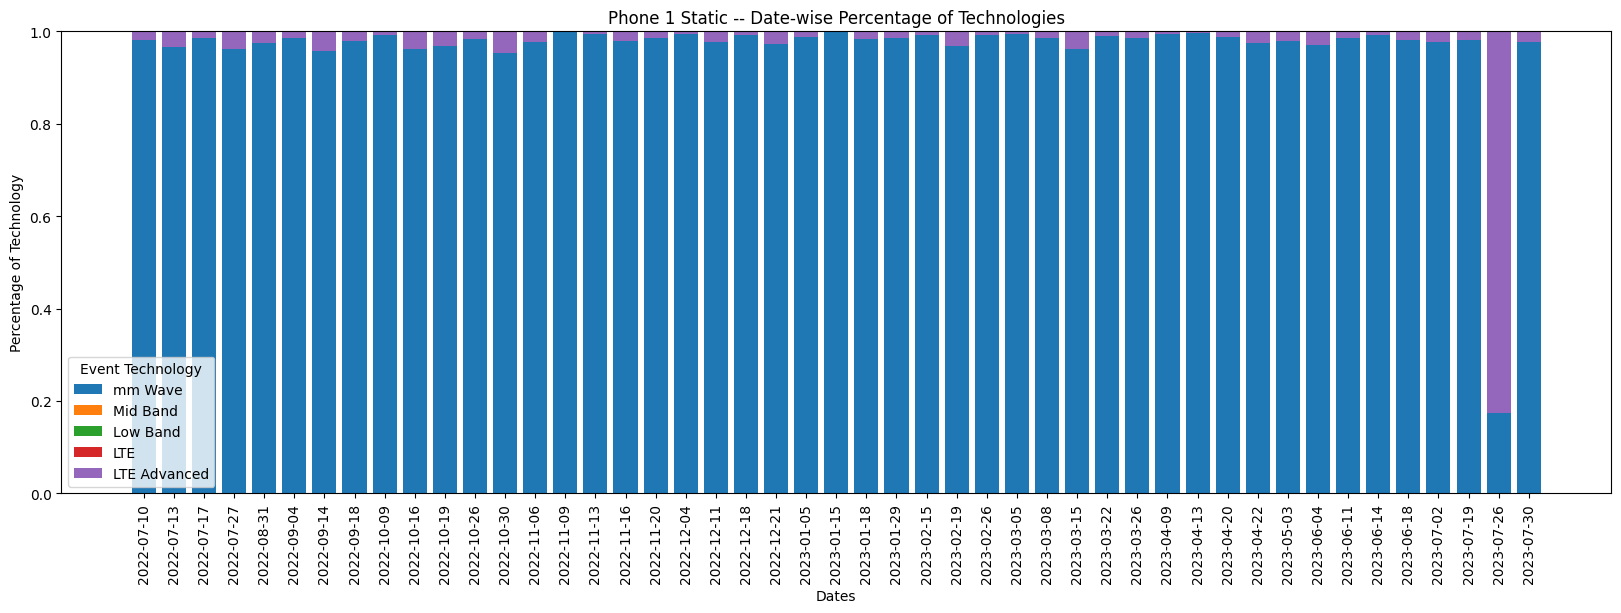

In [14]:
GenerateGraph("Phone1Static.csv", "Phone 1 Static")

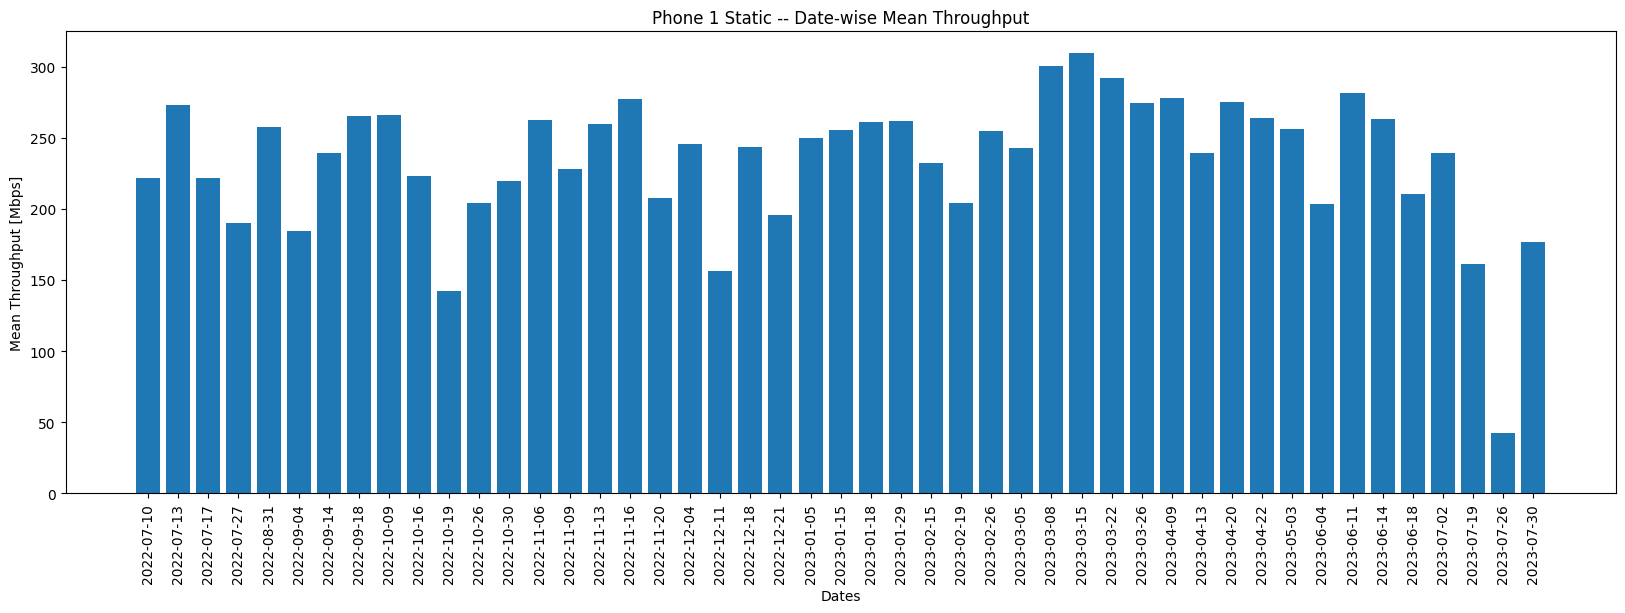

In [15]:
GenerateGraphThroughput("Phone1Static.csv", "Phone 1 Static")


### carrier aggregation

In [16]:
def carrier_technology(filename, title='give title here'):
    """ 
    input:
        filename:  csv file name of experiment
        title:  the name to be given to plot
    output:
        bar plot comparing the 5G uplink carrier technology
    """
    df  = pd.read_csv(filename)
    df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

    # getting the datewise counts
    datewise_counts =  df.groupby([df['TIME_STAMP'].dt.date, '5G KPI Total Info UL CA Type']).size().unstack(fill_value=0)

    datewise_percentages = datewise_counts.div(datewise_counts.sum(axis=1), axis=0)*100
    
    fig,ax = plt.subplots(figsize=(20,6))

    datewise_percentages.plot(kind='bar', linewidth=3,stacked=True,ax=ax)

    # customize the plot 
    ax.set_xlabel('Dates')
    ax.set_ylabel('Percentage of Technology')
    ax.set_title(f'{title} -- Date-wise Percentage of 5G KPI UL Categories')
    plt.legend(loc="lower center",fontsize="10",bbox_to_anchor=(0.15, 0.2))
    ax.legend(title= '5G KPI UL')
    plt.show()

### Phone 1 Static

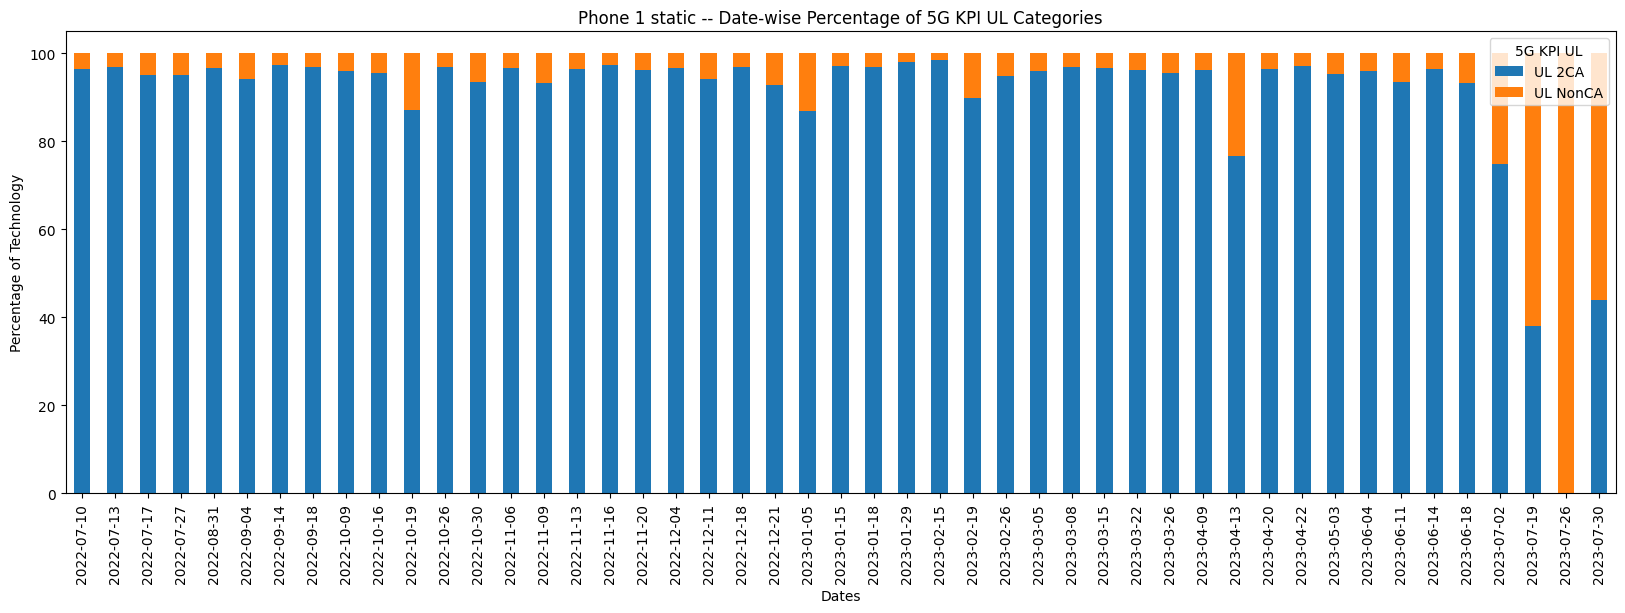

In [17]:
carrier_technology('Phone1Static.csv', title='Phone 1 static' ) 

### Phone 1 StaticAway

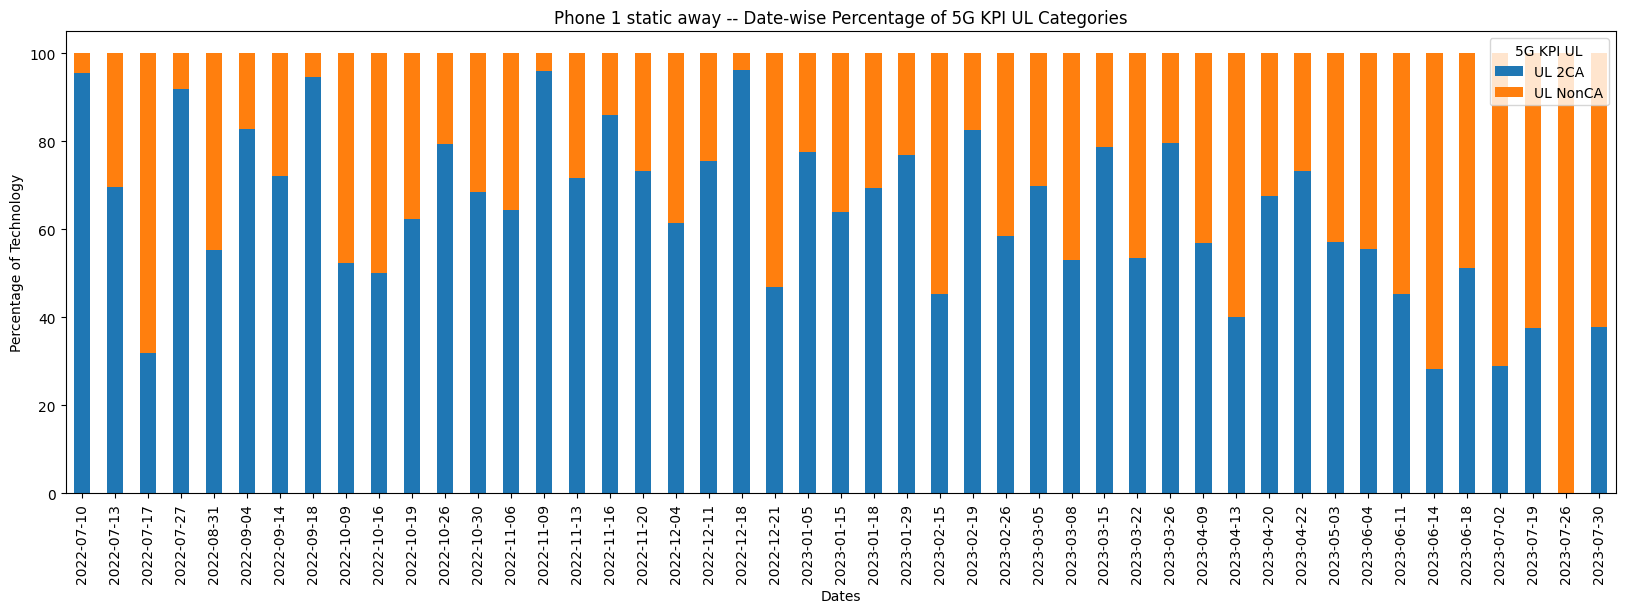

In [18]:
carrier_technology('Phone1Away.csv', title='Phone 1 static away' ) 

### Phone 1 Ping

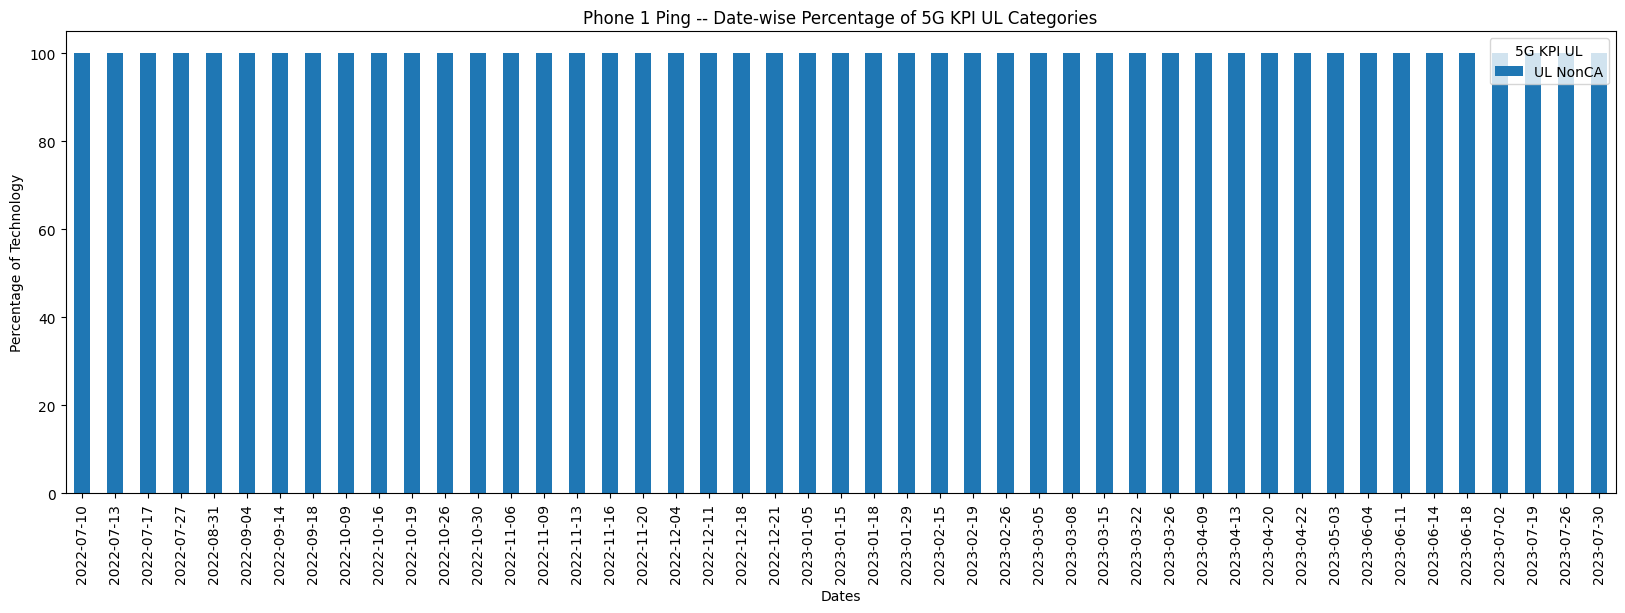

In [19]:
carrier_technology('Phone1Ping.csv', title='Phone 1 Ping' ) 

### Phone 1 Mobility

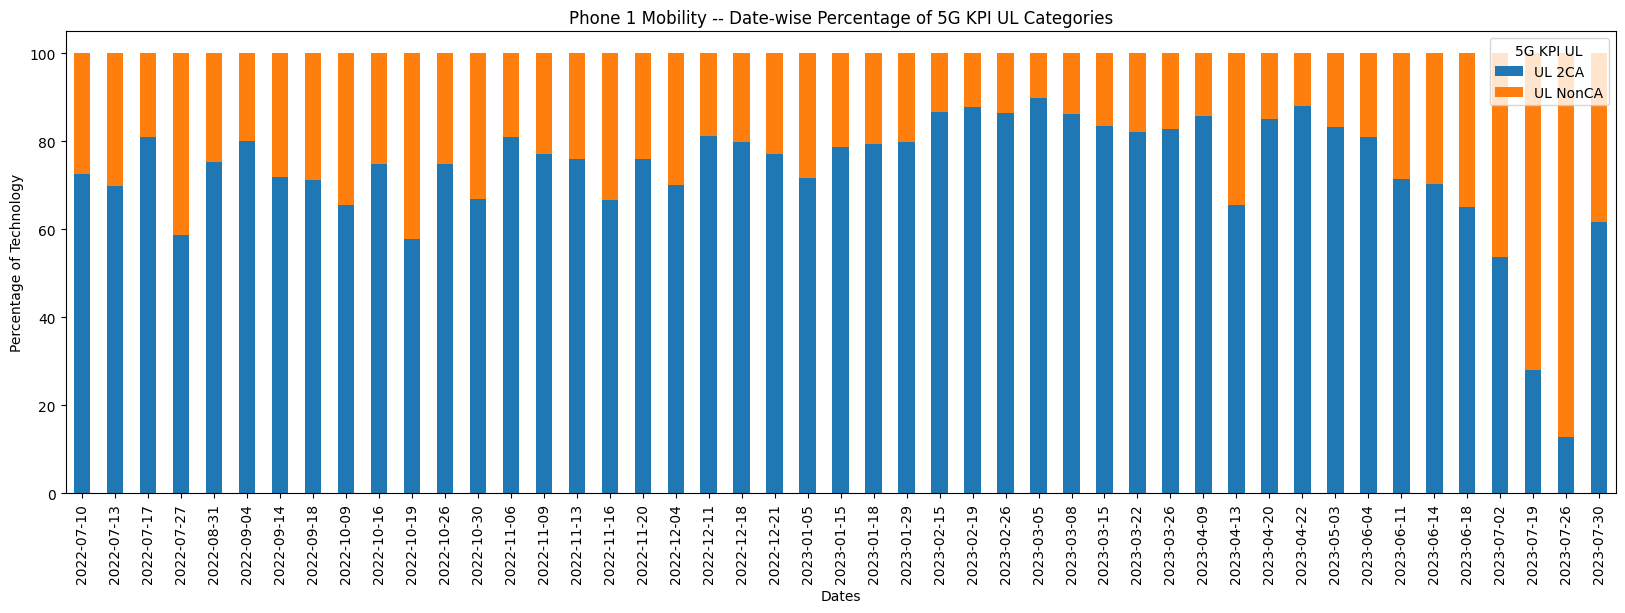

In [20]:
carrier_technology('Phone1Mobility.csv', title='Phone 1 Mobility' ) 

### Phone 1 Ping Mobility

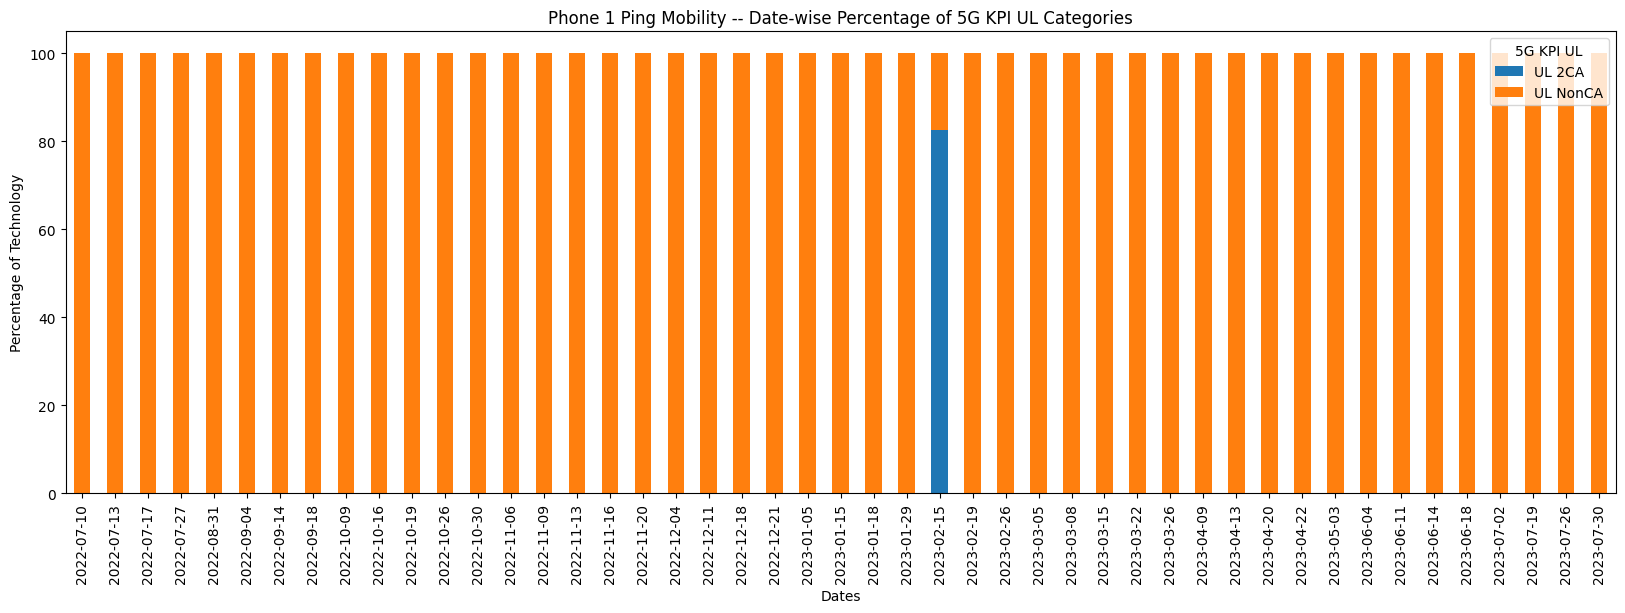

In [21]:
carrier_technology('Phone1PingMobility.csv', title='Phone 1 Ping Mobility' ) 

### carrier aggregation percentages

In [22]:
def visualize_tput(filename,title,col1, col2):
    """
    input:
        filename:  csv of current filename 
        title: title to be given to the plot 
        col1: as we are taking 5G vs LTE --> this is why we need two columns
    output:
        scatter (dot) plot of 5G VS LTE RSRQ OR RSRP
    """
    df = pd.read_csv(filename)
    df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])
    result = df.groupby(df['TIME_STAMP'].dt.date)[[col1,col2]].mean().reset_index()


    plt.figure(figsize=(20,6))

    plt.scatter(result['TIME_STAMP'], result[col1], label= col1, color='blue', marker='o')
    plt.scatter(result['TIME_STAMP'], result[col2], label= col2 , color='red', marker='x')

    plt.xlabel('Date')
    plt.ylabel('Average Values')
    plt.title(f'Average {title} values of LTE and 5G Comparison')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.xticks(result['TIME_STAMP'], rotation=90, ha='right')  # Set x-axis ticks to match all dates 
    plt.legend(loc="lower center",fontsize="10",bbox_to_anchor=(0.15, 0.2))
    plt.grid()
    plt.show()


### Scatter Plots of Carrier Aggregation Technologies - % of times there was 2CA -- Scatter Plots

"Also the Nan values in 5g kpi ul column are filled with zeros to show 'nonca'"

Also the Nan values in 5g kpi ul column are dropped instead of inputtting with nonca

In [23]:
def pct_2ca(filename , title = '', legend= None, xlabel = None , ylabel = None):
    # reading the filename
    df = pd.read_csv(filename)
    df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

    # filling the Nan values by UL NonCA 
    # df['5G KPI Total Info UL CA Type'].fillna('UL NonCA',inplace=True)

    #MEthod2: Dropping the Nan values 
    # df['5G KPI Total Info UL CA Type'].dropna(inplace=True)    --> It automatically ignores the Nan Values 
    
    
    df['date'] = df['TIME_STAMP'].dt.date
    # grouping to count the amount of 2CA and NonCA for each experiment for each day
    res =  df.groupby([df['date'], df['Experiment'] , '5G KPI Total Info UL CA Type']).size().unstack(fill_value=0).reset_index()
    # calculating the percentage of 2CA
    res['2ca_pct']  =  res['UL 2CA'] / (res['UL 2CA'] + res['UL NonCA'])

    # to create the scatter plots easily creating a new data frame from 'res' df where each day has a list of 5 pct_ca
    new_df = res.groupby('date')['2ca_pct'].apply(list).reset_index()


    # plotting the graph
    colors = ['red','blue','green','orange','purple']         # color map
    fig, ax = plt.subplots(figsize=(35, 15))                # figure size 

    for idx,row in new_df.iterrows():
        for j in range(len(row[1])):
            ax.scatter(idx, row[1][j] ,  color = colors[j] ,s = 80,alpha=0.7)
            # ax.text(idx, row[1][j] , f'{j}',fontsize=20,ha='left',rotation=45 )     // adds labels to points

    # dates have been taken separately and labelled on x-axis otherwise, python creates gaps based on gaps between days
    dates = [str(d) for d in new_df['date']]
    dates

    ax.set_title(f'{title} Percentage of 2CA for 5 runs',fontsize=20,fontweight='bold')
    ax.set_xlabel(xlabel,fontsize=20,fontweight='bold')
    ax.set_ylabel(ylabel,fontsize=20,fontweight='bold')
    ax.legend(legend,title='Experiment Number',title_fontsize= "xx-large",loc='upper right',bbox_to_anchor= (1.06,0.5),fontsize=30)
    plt.xticks(new_df.index, dates, rotation=90, fontsize=20,fontweight='bold')
    plt.yticks(fontsize=20,fontweight='bold')
    # Show the plot
    plt.tight_layout()
    plt.grid()
    plt.show()
        

### Phone 1 Static

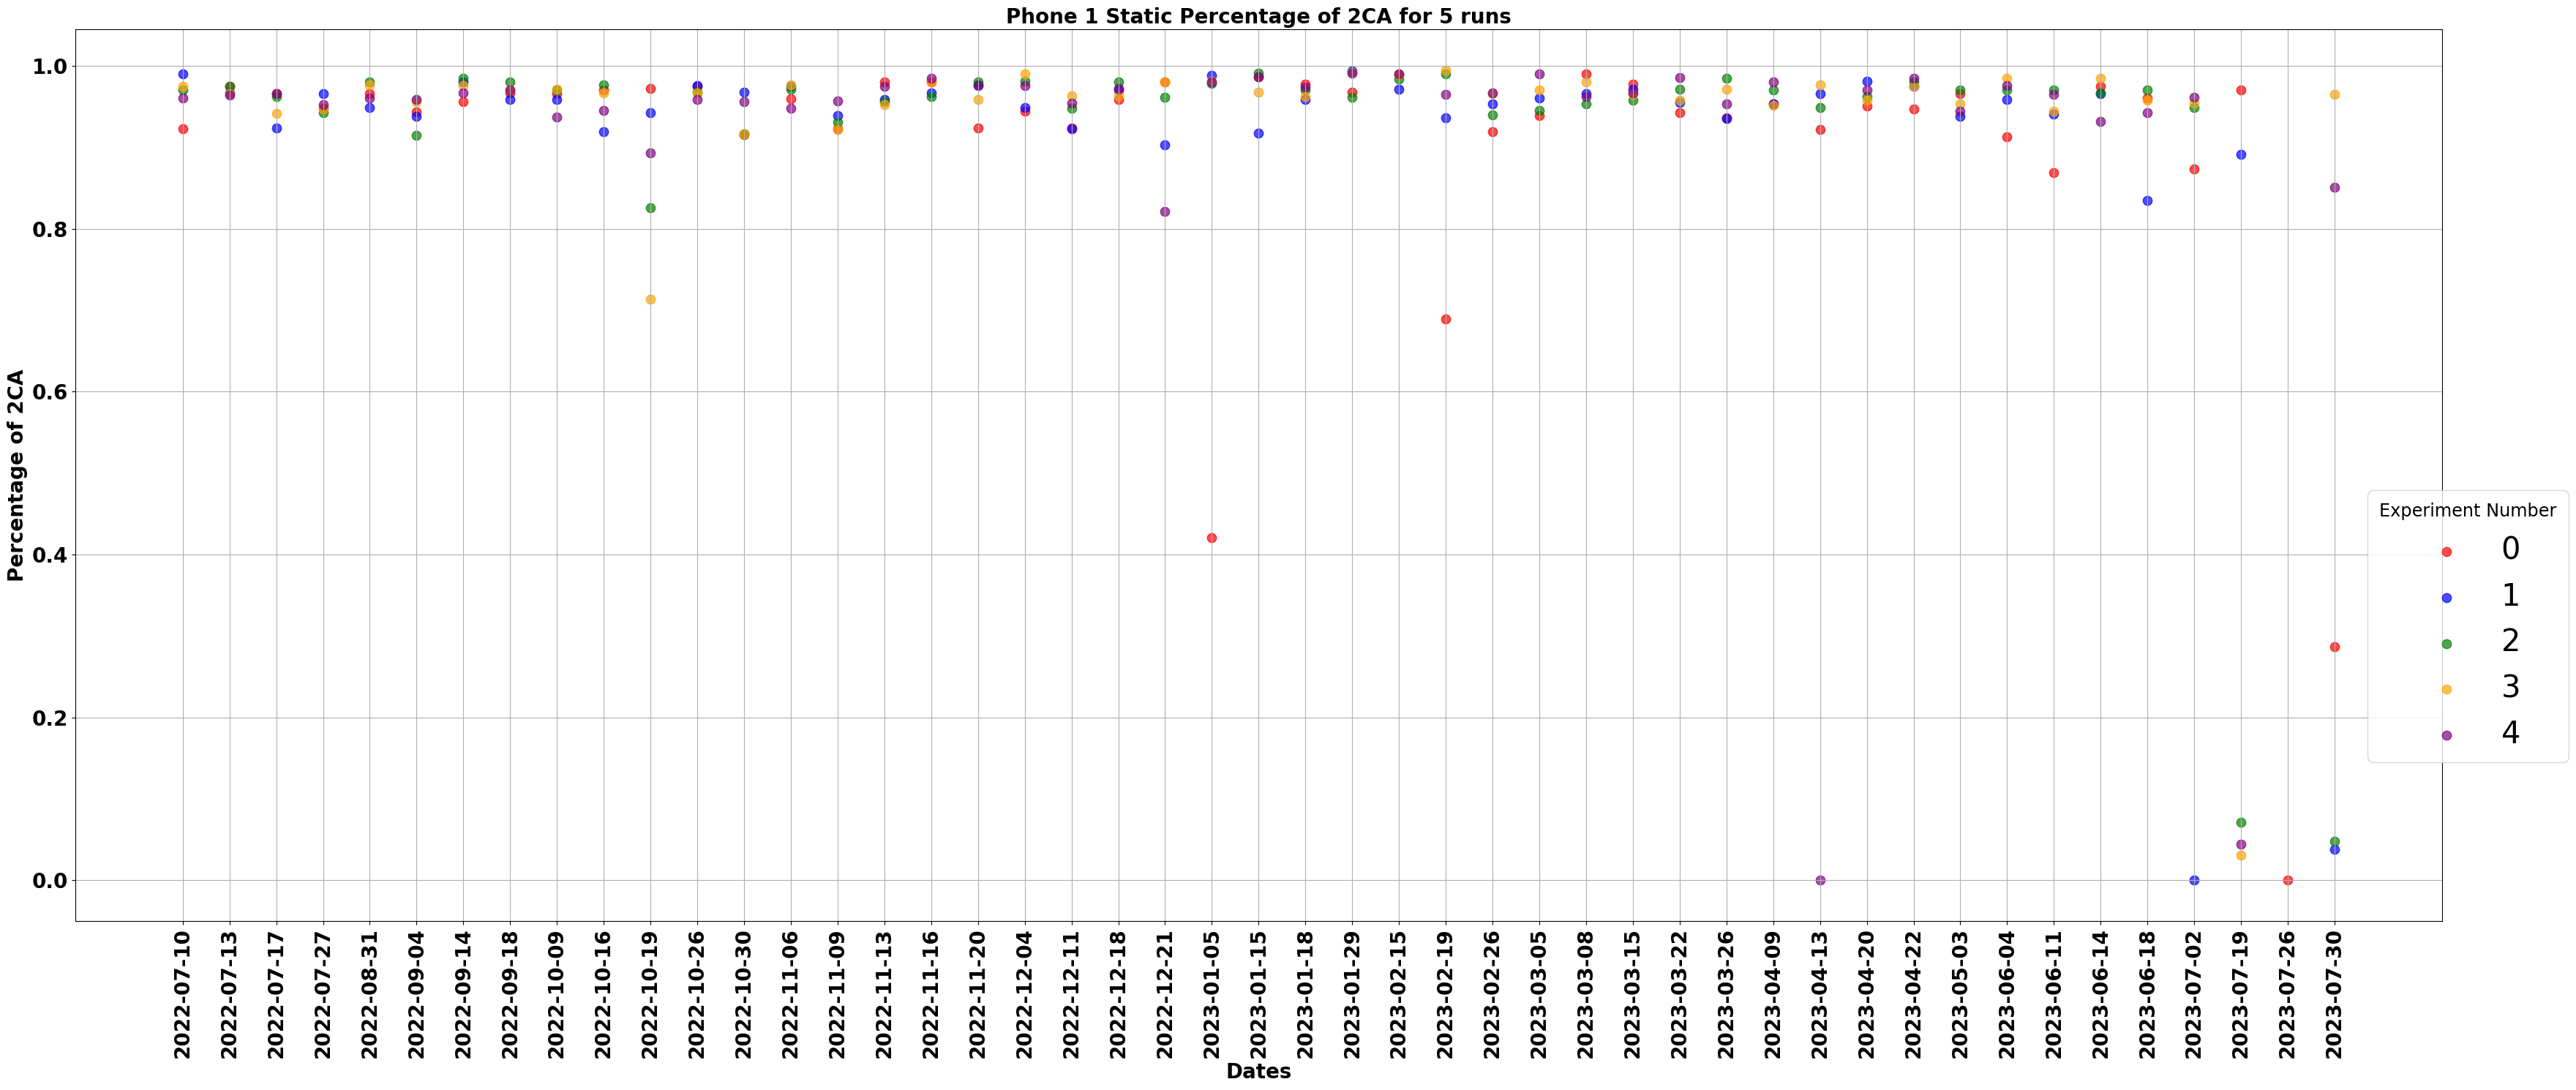

In [24]:
pct_2ca(filename='Phone1Static.csv', title='Phone 1 Static',legend= ['0','1','2','3','4'] , xlabel='Dates' , ylabel='Percentage of 2CA')

### Phone 1 Away

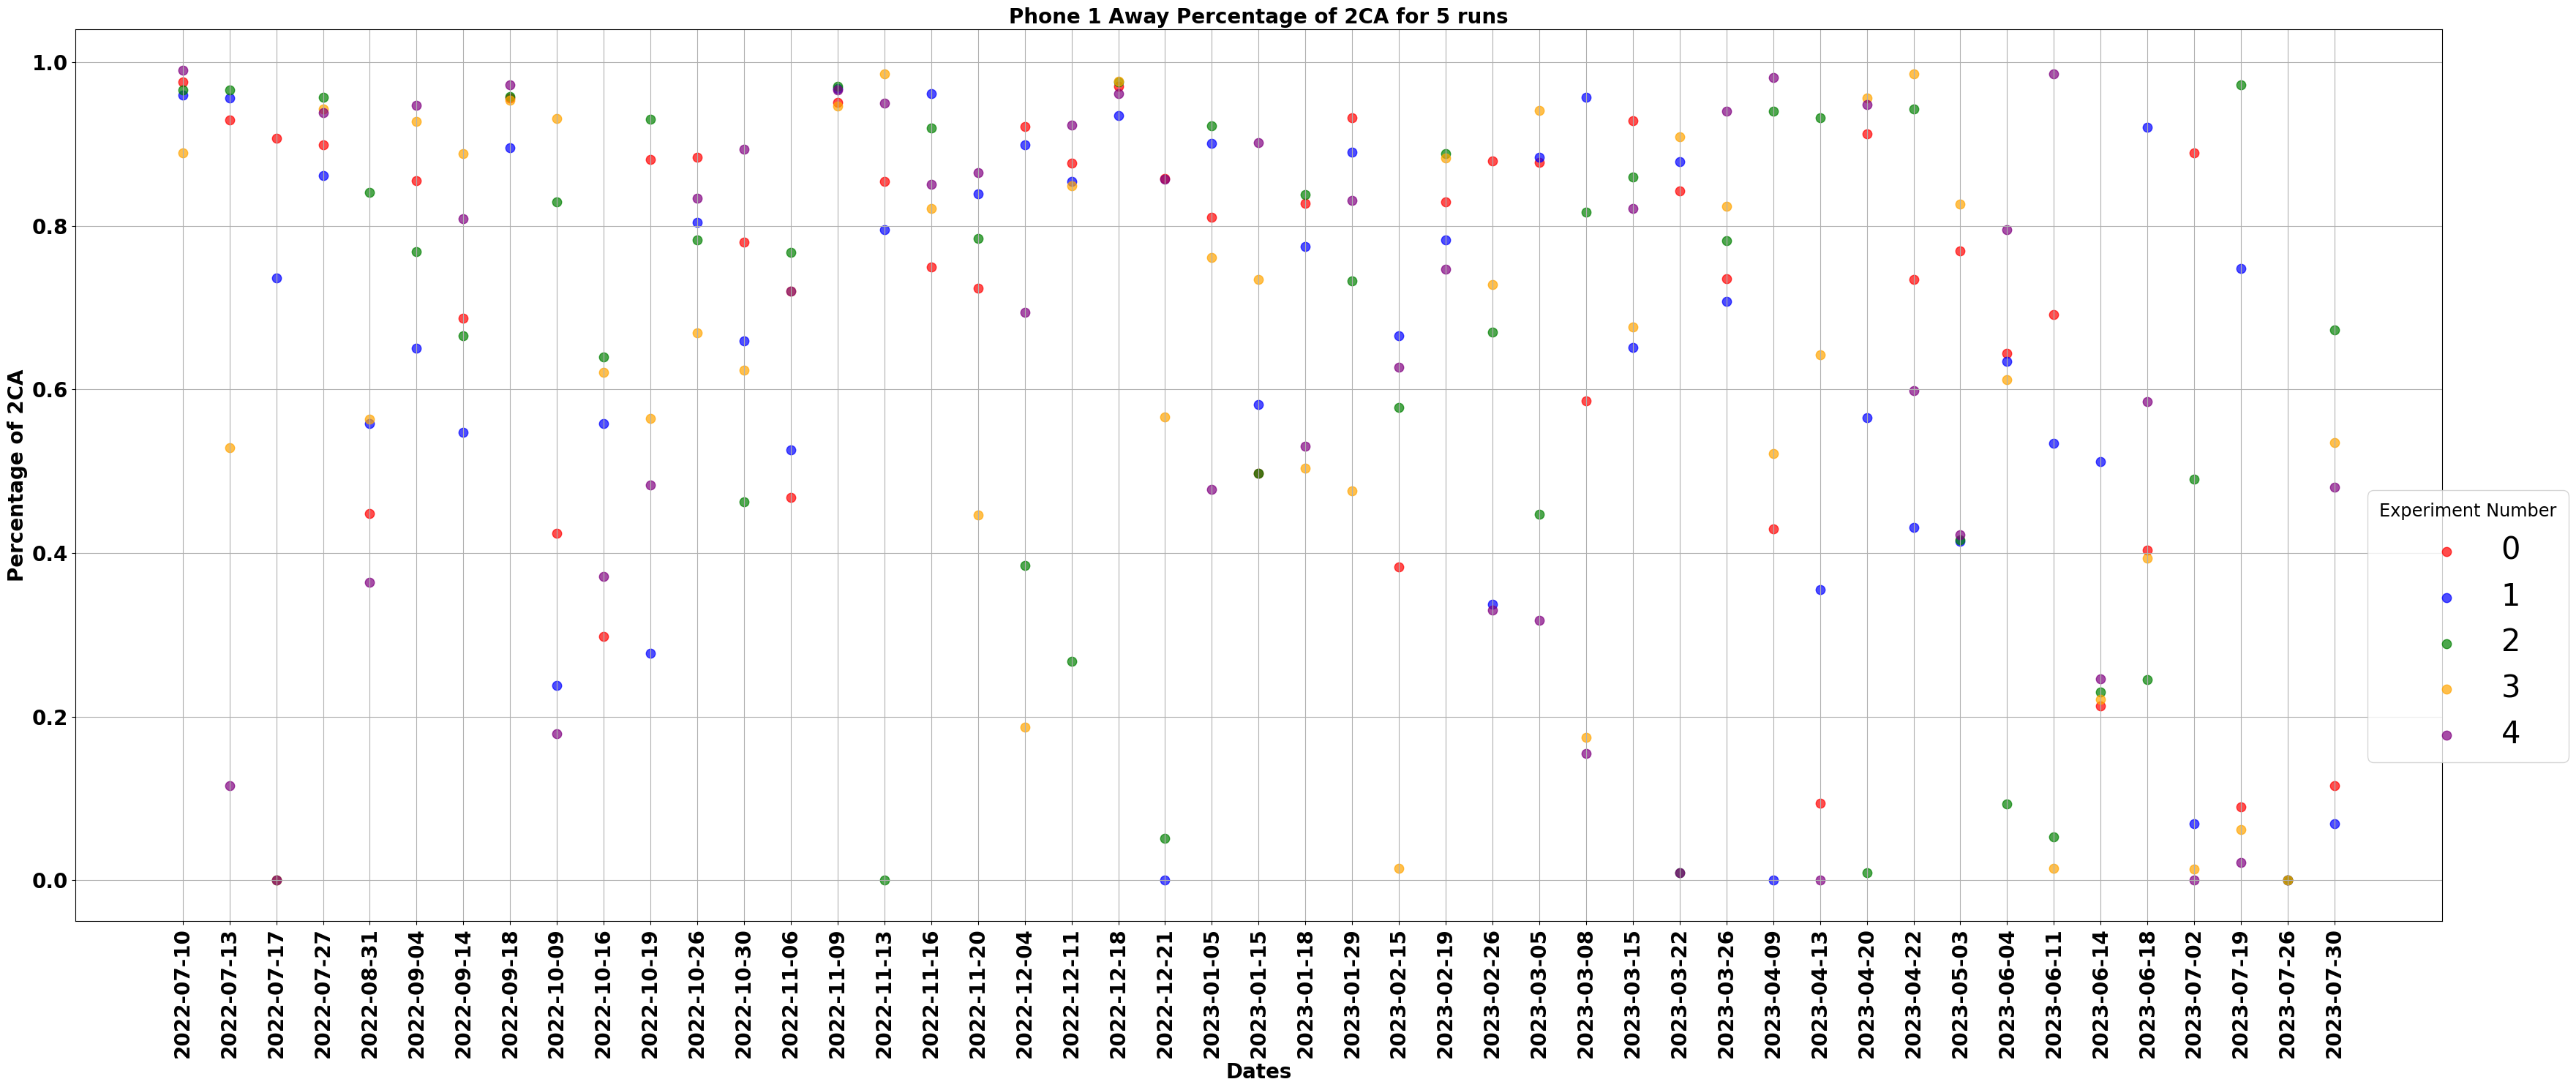

In [25]:
pct_2ca(filename='Phone1Away.csv', title='Phone 1 Away',legend= ['0','1','2','3','4'] , xlabel='Dates' , ylabel='Percentage of 2CA')

### Phone 1 Ping

In [26]:
pct_2ca('Phone1Ping.csv', 'Phone 1 Ping')   # There is no UL 2CA in Phone 1 Ping   // only 

KeyError: 'UL 2CA'

In [27]:
df = pd.read_csv('Phone1Ping.csv')
df['5G KPI Total Info UL CA Type'].value_counts()

5G KPI Total Info UL CA Type
UL NonCA    32086
Name: count, dtype: int64

### Phone 1 Mobility 


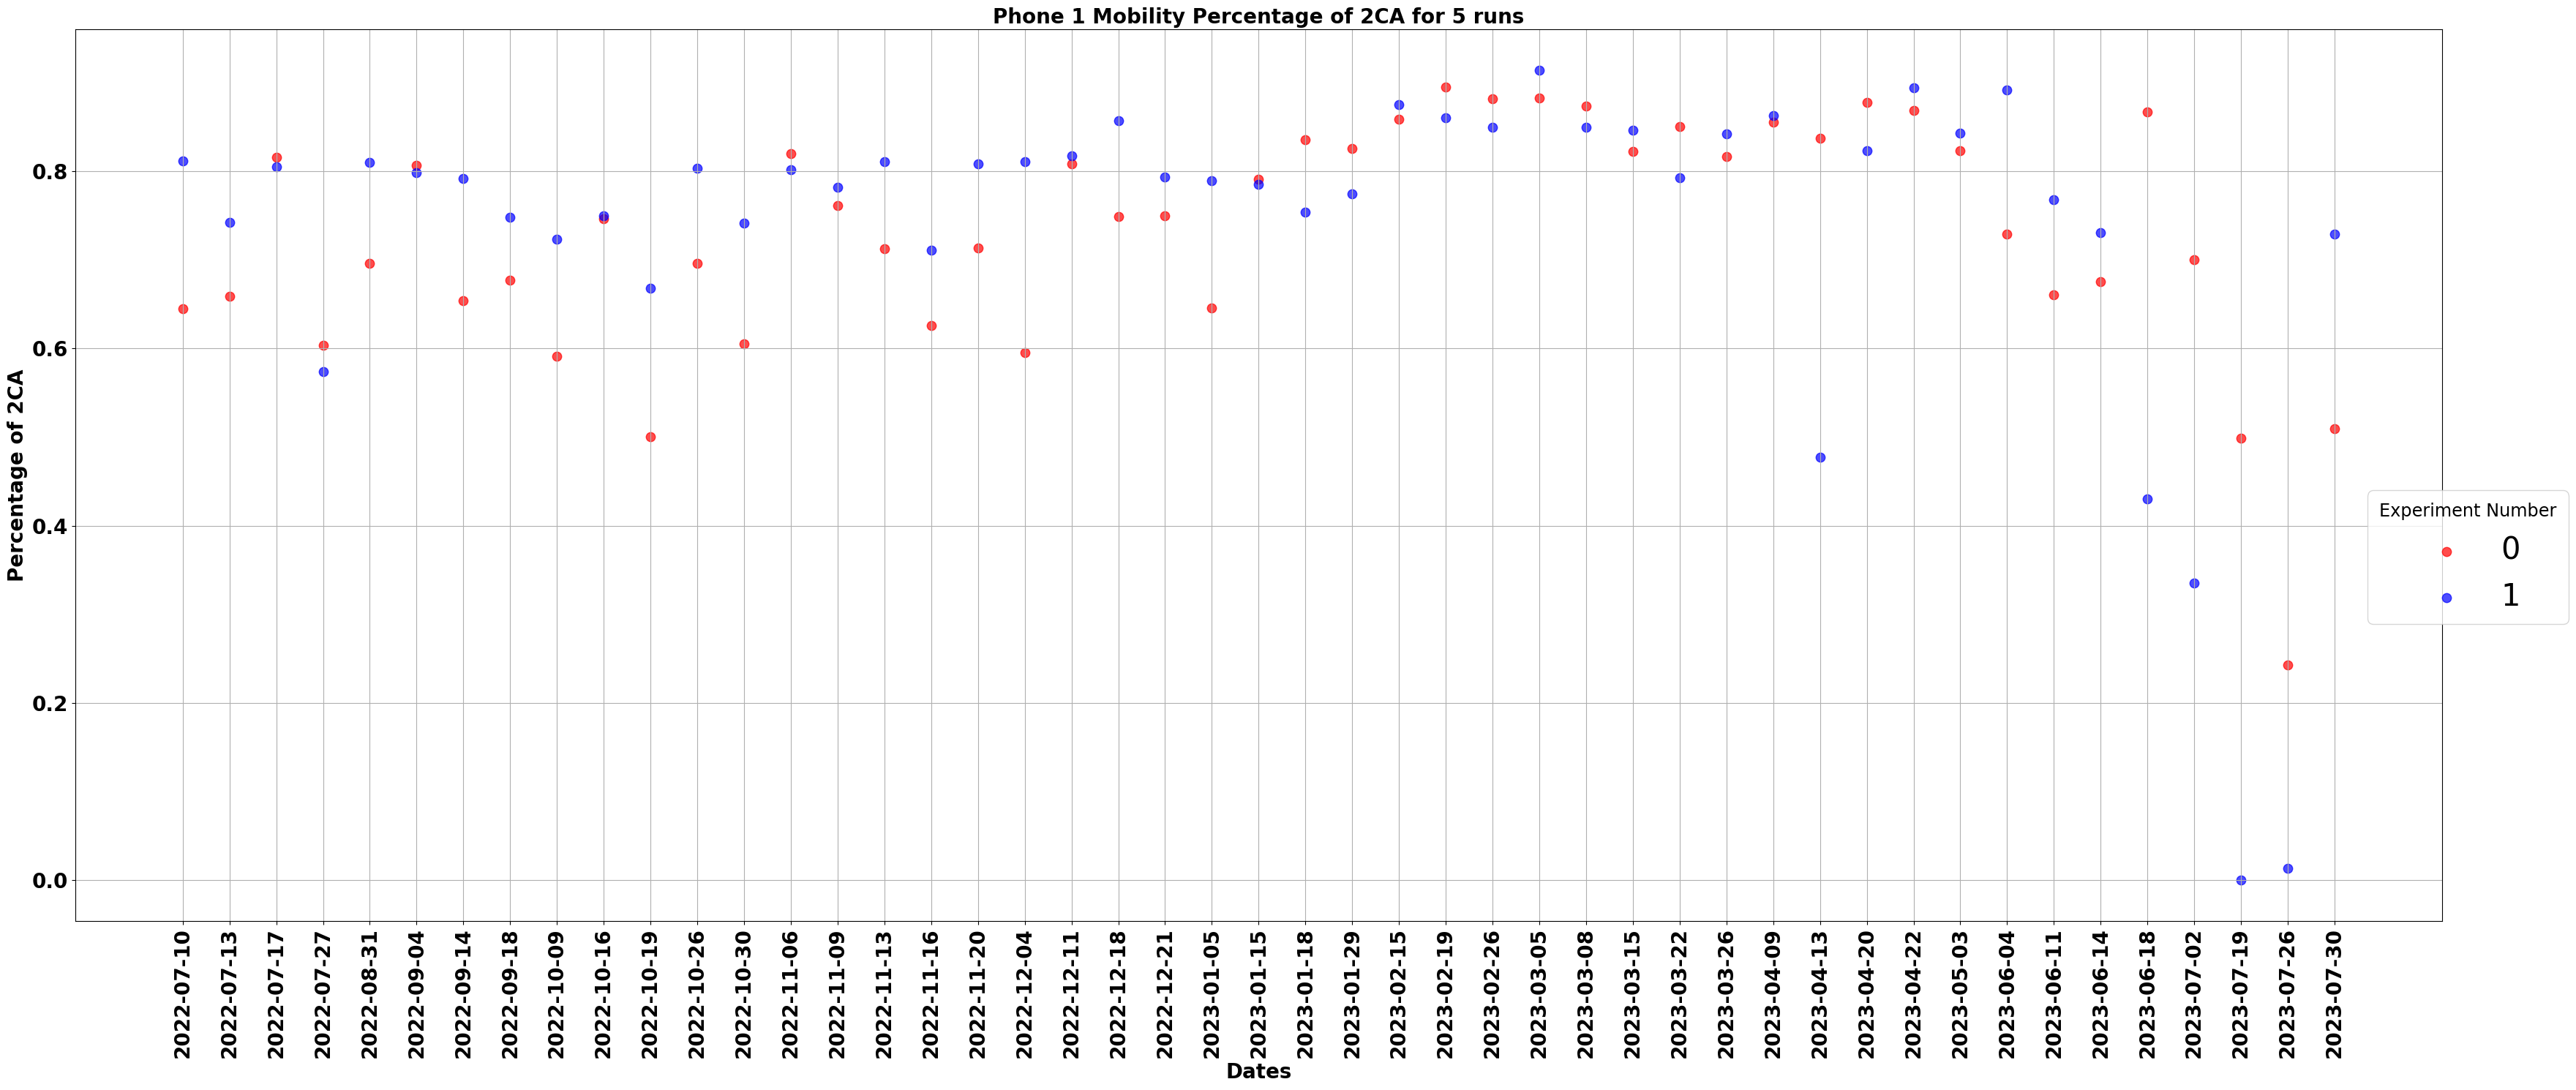

In [29]:
pct_2ca(filename='Phone1Mobility.csv', title='Phone 1 Mobility',legend= ['0','1'] , xlabel='Dates' , ylabel='Percentage of 2CA')

### Phone 1 Ping Mobility 

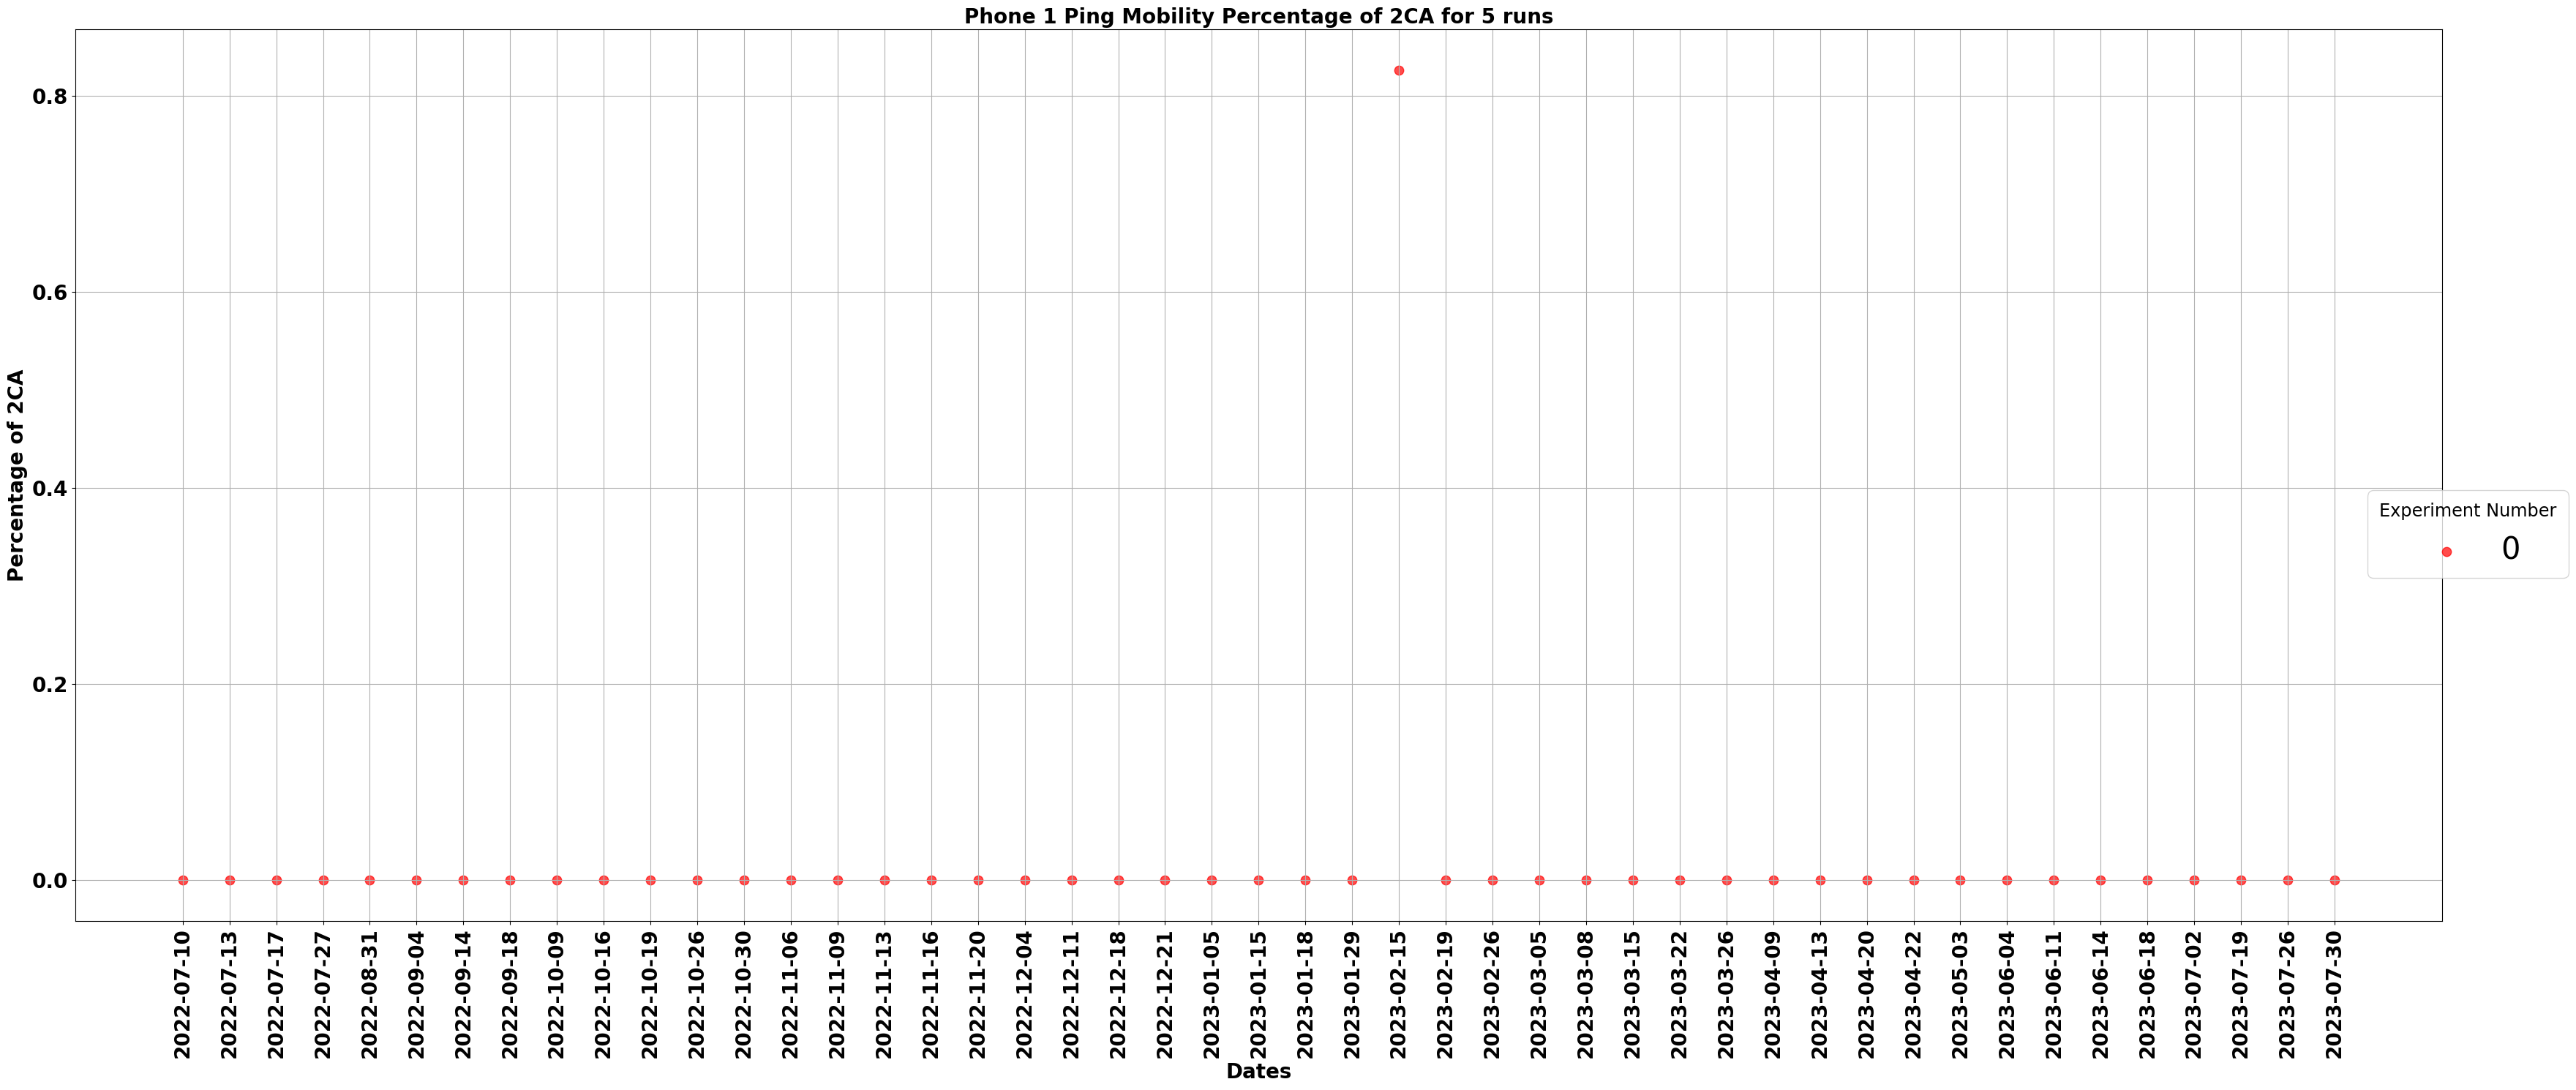

In [30]:
pct_2ca('Phone1PingMobility.csv', 'Phone 1 Ping Mobility' , xlabel = 'Dates', ylabel= 'Percentage of 2CA', legend=['0'])       

## ScatterPlots

In [31]:
def tput_vs_ca_scatterplot(filename, title,  legend , xlabel = None, ylabel =None):
    df  =  pd.read_csv(filename) 
    df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])
    df['date'] = df['TIME_STAMP'].dt.date
    df['Event Technology'].ffill(inplace=True)
    df["5G KPI PCell RF Frequency [MHz]"].ffill(inplace=True)
    df["LTE KPI PCell Serving EARFCN(DL)"].ffill(inplace=True)
    df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
    df = df[df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"] > 0]
    df.dropna(subset = ['Event Technology'], inplace=True)

    # % CA
    # df['5G KPI Total Info UL CA Type'].fillna('UL NonCA',inplace=True)
    
    df['date'] = df['TIME_STAMP'].dt.date
        # grouping to count the amount of 2CA and NonCA for each experiment for each day
    res =  df.groupby([df['date'], df['Experiment'] , '5G KPI Total Info UL CA Type']).size().unstack(fill_value=0).reset_index()
        # calculating the percentage of 2CA
    res['2ca_pct']  =  res['UL 2CA'] / (res['UL 2CA'] + res['UL NonCA'])
    res = res.groupby('date')['2ca_pct'].apply(list).reset_index()

    # average tput per test 
    df['Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]'].fillna(0, inplace=True)
    # average tput for each test 
    tput = df.groupby(['date', 'Experiment'])['Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]'].mean().unstack(fill_value=0).reset_index()

     
    # merging dataframes 
    merged =  res.merge(tput, on='date', how = 'inner')
    if len(merged.columns) == 7: 
        merged.columns = ['date', '2ca_pct', 0,1,2,3,4]    # for different column names
    elif len(merged.columns) == 3:
        merged.columns = ['date' ,'2ca_pct', 0]
    elif len(merged.columns) == 4:
        merged.columns = ['date' , '2ca_pct', 0, 1]

    # plotting the data
    fig,ax = plt.subplots(figsize=(17,7))
    colors = ['red','blue','green','orange','purple']    

    for idx, row in merged.iterrows():
        for j in range(len(row['2ca_pct'])):
            ax.scatter(row['2ca_pct'][j] ,  row[j] , color  = colors[j])

    ax.set_title(f' {title} -- Throughput v/s Percentage of 2CA',fontsize=15,fontweight='bold')
    ax.set_xlabel(xlabel,fontsize=15,fontweight='bold')
    ax.set_ylabel(ylabel,fontsize=15,fontweight='bold')
    ax.legend(legend,title='Experiment Number',loc='upper right',bbox_to_anchor= (1.1,0.5),fontsize=20)
        # Show the plot
    plt.tight_layout()
    plt.grid()
    plt.show()
        

### Phone 1 Static

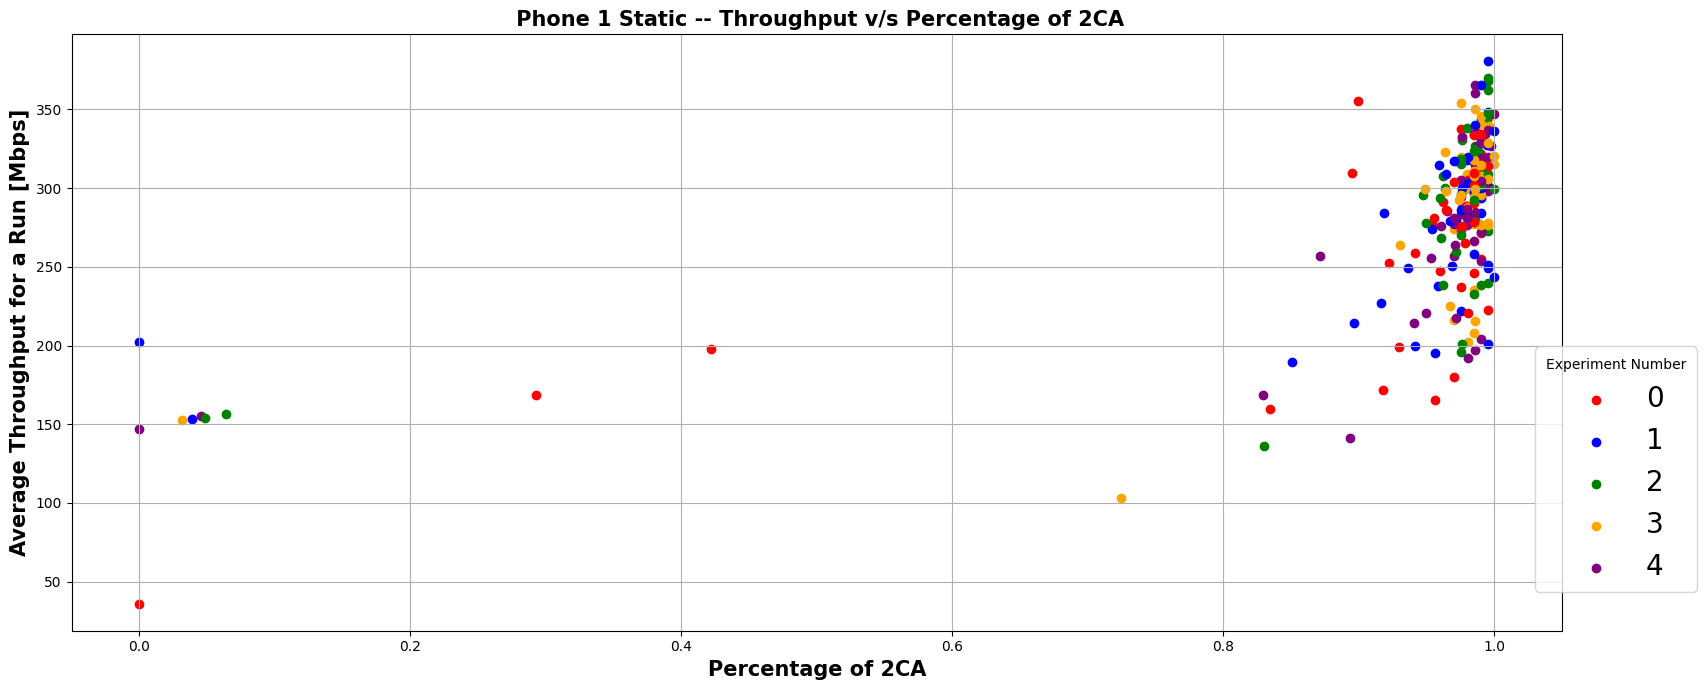

In [32]:
tput_vs_ca_scatterplot('Phone1Static.csv', 'Phone 1 Static' , legend = ['0','1','2','3','4'], ylabel = 'Average Throughput for a Run [Mbps]',xlabel = 'Percentage of 2CA')

### Phone 1 Away

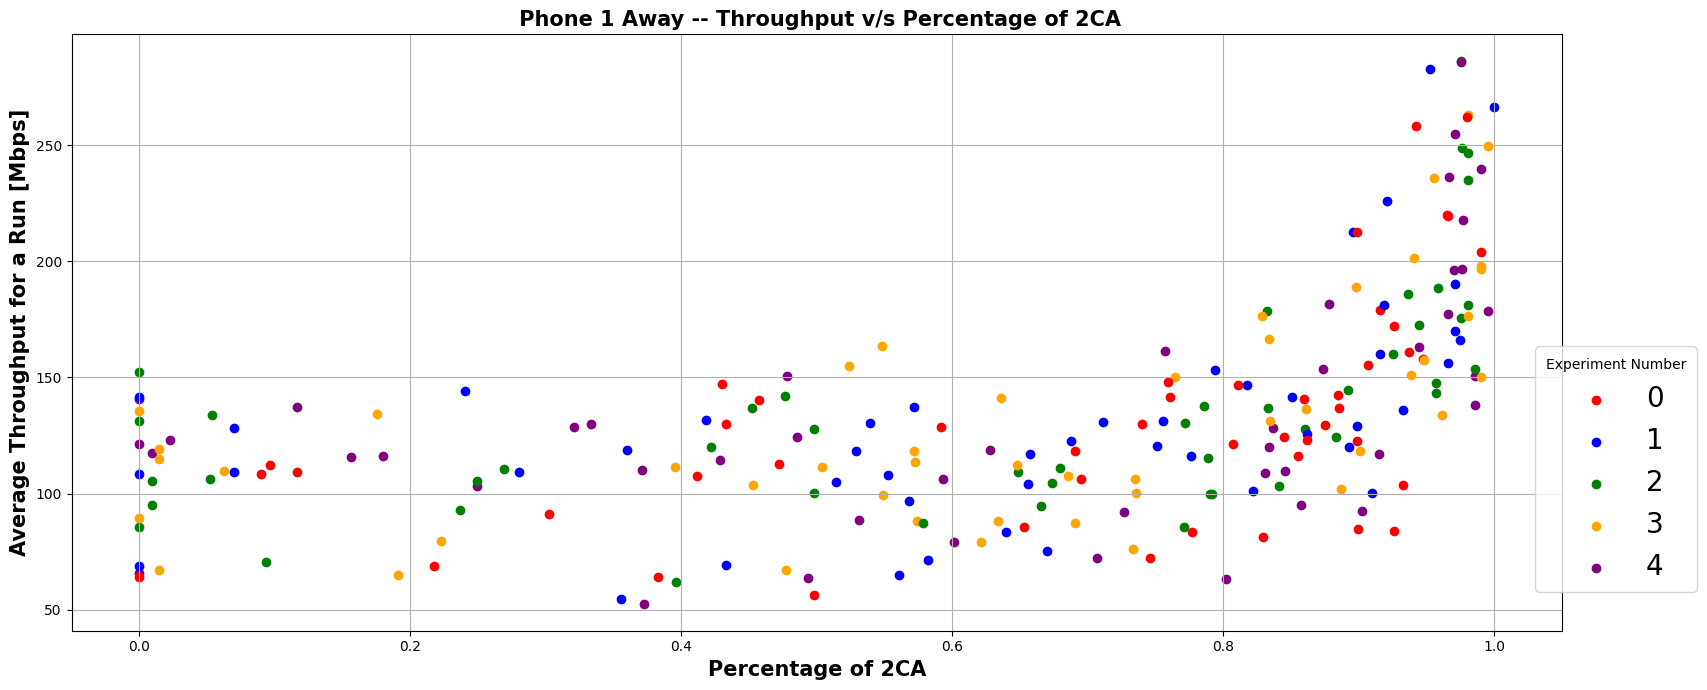

In [33]:
tput_vs_ca_scatterplot('Phone1Away.csv', 'Phone 1 Away' ,legend = ['0','1','2','3','4'] , xlabel= 'Percentage of 2CA', ylabel='Average Throughput for a Run [Mbps]')

### Phone 1 Ping

In [34]:
tput_vs_ca_scatterplot('Phone1Ping.csv', 'Phone 1 Ping' , legend = ['0','1','2','3','4'])   # there is no ul 2ca

KeyError: 'UL 2CA'

### Phone 1 Mobility 


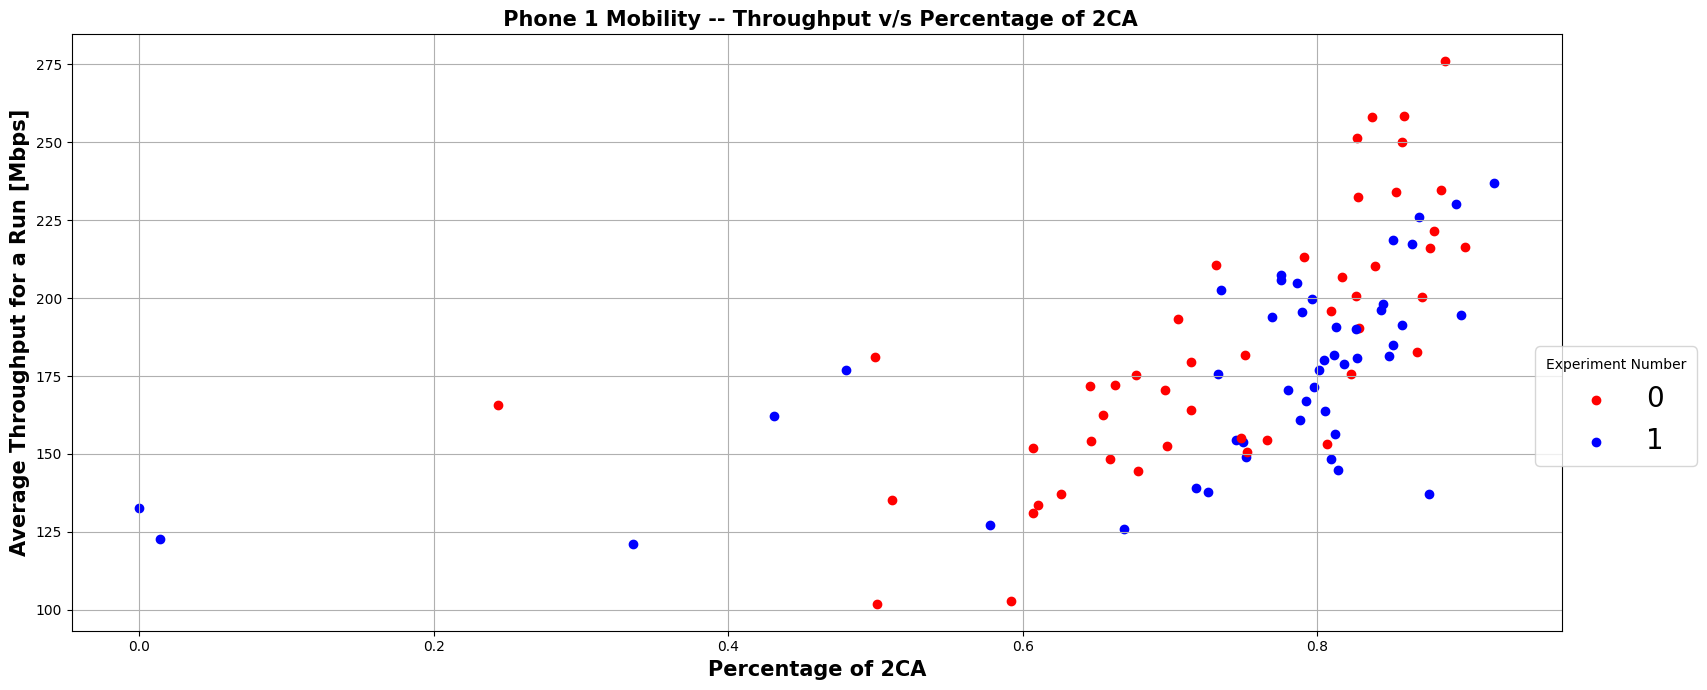

In [35]:
tput_vs_ca_scatterplot('Phone1Mobility.csv', "Phone 1 Mobility", legend  = ['0','1'] ,xlabel = 'Percentage of 2CA', ylabel= 'Average Throughput for a Run [Mbps]')

### Phone 1 Ping Mobility 

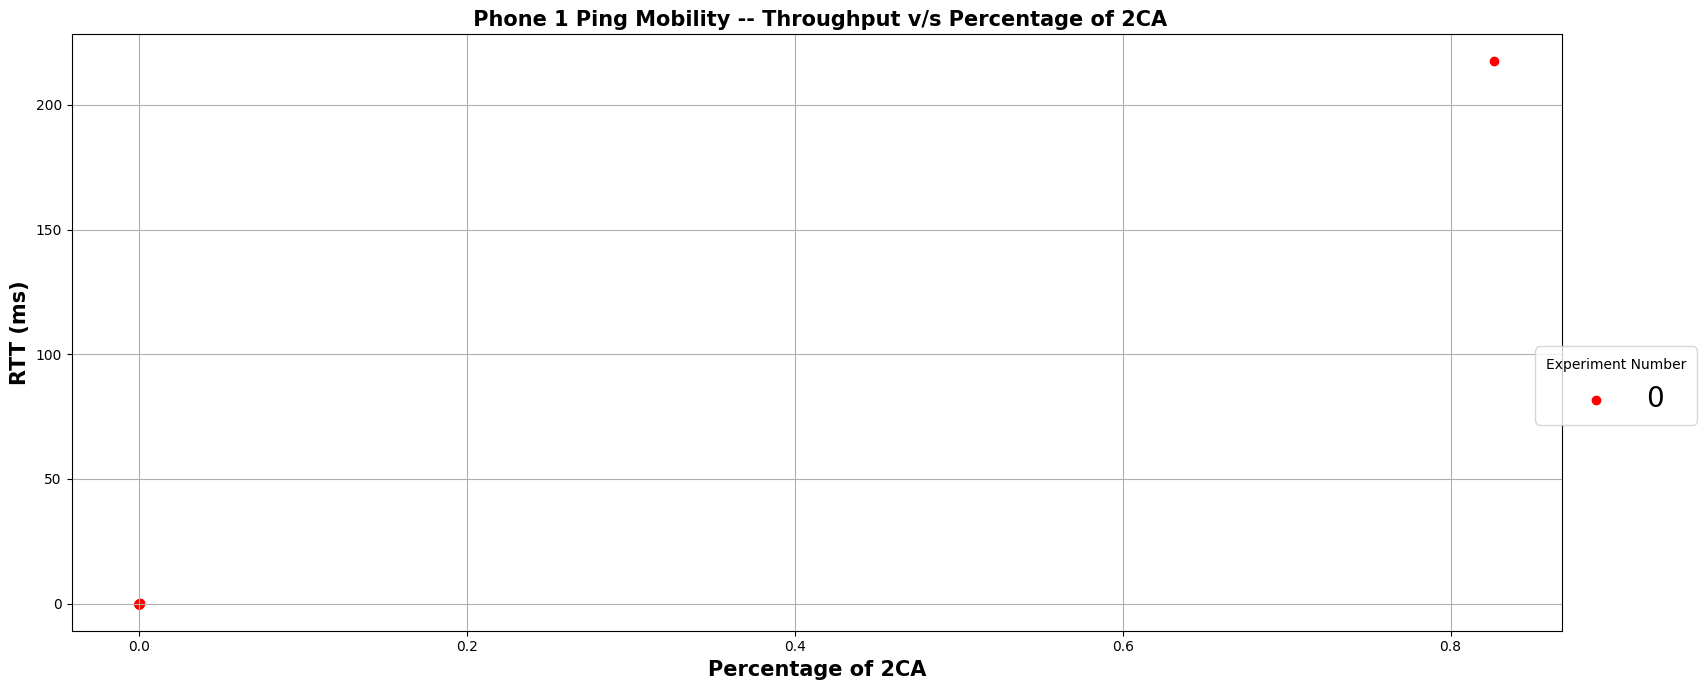

In [36]:
tput_vs_ca_scatterplot('Phone1PingMobility.csv', 'Phone 1 Ping Mobility' , legend=['0'], ylabel = 'RTT (ms)', xlabel = 'Percentage of 2CA')

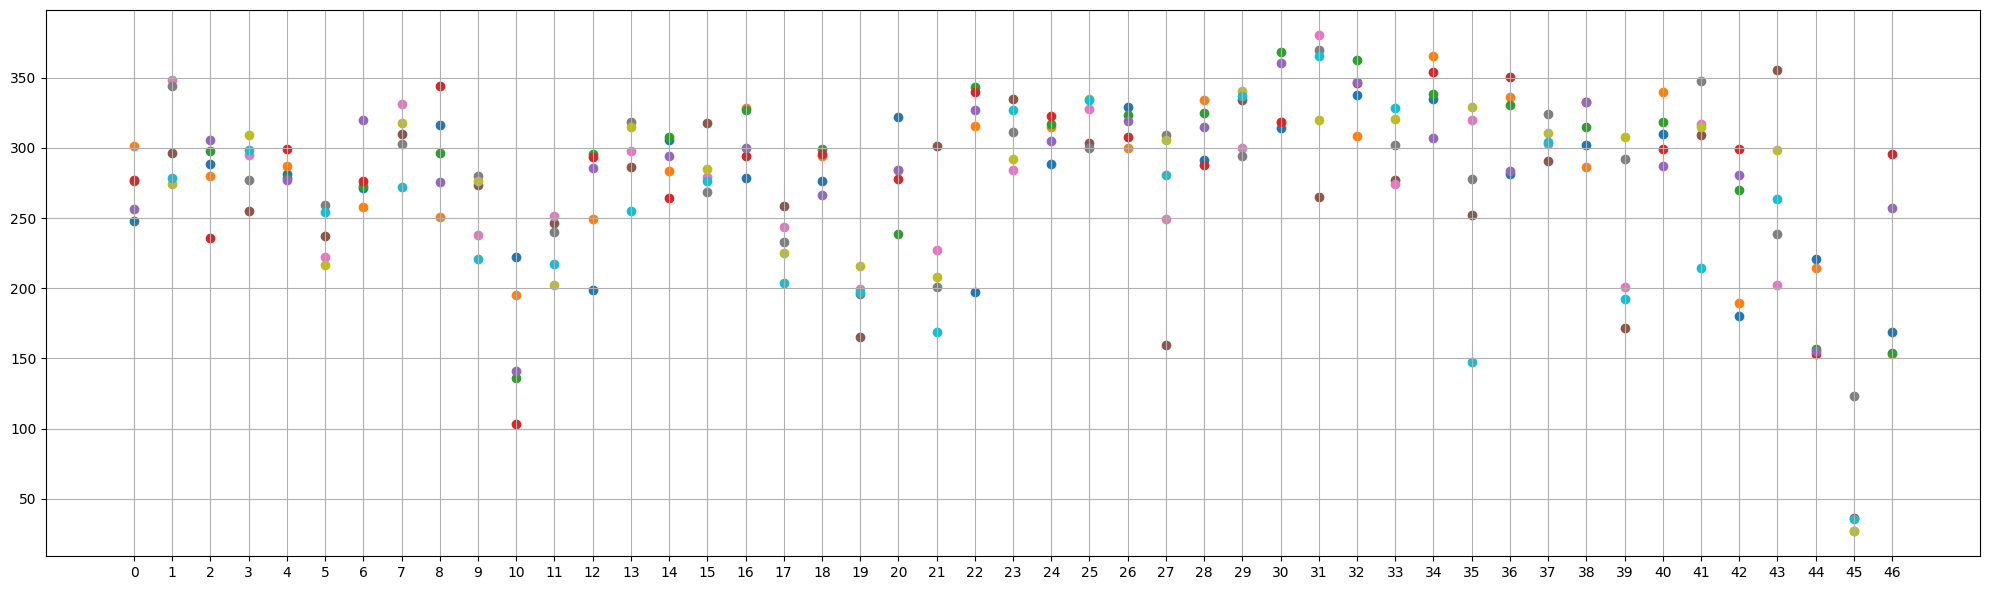

In [37]:
# Sample 
df  =  pd.read_csv('Phone1Static.csv') 
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])
df['date'] = df['TIME_STAMP'].dt.date
df['Event Technology'].ffill(inplace=True)
df["5G KPI PCell RF Frequency [MHz]"].ffill(inplace=True)
df["LTE KPI PCell Serving EARFCN(DL)"].ffill(inplace=True)
df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"].ffill(inplace=True)
df = df[df["Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]"] > 0]
df.dropna(subset = ['Event Technology'], inplace=True)

df['date'] = df['TIME_STAMP'].dt.date
        # grouping to count the amount of 2CA and NonCA for each experiment for each day
res =  df.groupby([df['date'], df['Experiment'] , '5G KPI Total Info UL CA Type']).size().unstack(fill_value=0).reset_index()
        # calculating the percentage of 2CA
res['2ca_pct']  =  res['UL 2CA'] / (res['UL 2CA'] + res['UL NonCA'])
res = res.groupby('date')['2ca_pct'].apply(list).reset_index()

    # average tput per test 
df['Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]'].fillna(0, inplace=True)
    # average tput for each test 
tput = df.groupby(['date', 'Experiment'])['Smart Phone Smart Throughput Mobile Network UL Throughput [Mbps]'].mean().unstack(fill_value=0).reset_index()


fig,ax = plt.subplots(figsize=(20,6))

for i in tput.index:
    for j in range(5):
        ax.scatter(i, tput[j][i])

plt.xticks(tput.index)
plt.tight_layout()
plt.grid()
plt.show()
